In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
#Libraries setup
os.chdir('/dados/home-credit')
print(os.getcwd())
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/dados/home-credit


In [8]:
#Importing datasets
#train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')
#b1 = pd.read_csv('bureau.csv')
#bb2 = pd.read_csv('bureau_balance.csv')
#pa1 = pd.read_csv('previous_application.csv')
#pos2 = pd.read_csv('POS_CASH_balance.csv')
#ip2 = pd.read_csv('installments_payments.csv')
#cb2 = pd.read_csv('credit_card_balance.csv')
description = pd.read_csv("/home/shink/gdata/hcg_gabi_shin/HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
#sample = pd.read_csv('sample_submission.csv')

In [9]:
#dataset_setup
test.columns = map(str.lower, test.columns)
description.columns = map(str.lower, description.columns)
test.head()

sk_id_curr name_contract_type code_gender flag_own_car flag_own_realty  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   cnt_children  amt_income_total  amt_credit  amt_annuity  amt_goods_price  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  name_type_suite name_income_type            name_education_type  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  name_family_status  name_housing_type  region_population_relative  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   days_birth  days_employed  days_registration  days_id_publish  own_car_age  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   flag_mobil  flag_emp_phone  flag_work_phone  flag_cont_mobile  flag_phone  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   flag_email     occupation_type  cnt_fam_members  region_rating_client  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   region_rating_client_w_city weekday_appr_process_start  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   hour_appr_process_start  reg_region_not_live_region  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   reg_region_not_work_region  live_region_not_work_region  \
0                   

## Exploration

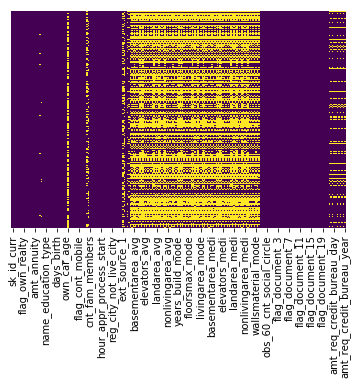

In [10]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [14]:
#name_contract_type (crédito rotativo é o crédito em caso de falta de dinheiro, têm juros mais altos)
print(description['description'][2])
print(test.name_contract_type.isnull().sum())
test.groupby(test.name_contract_type).describe()

Identification if loan is cash or revolving
0


amt_annuity                                               \
                         count          mean           std     min      25%   
name_contract_type                                                            
Cash loans             48281.0  29568.954102  15975.314146  2295.0  18193.5   
Revolving loans          439.0  13730.637813  12358.123881  6750.0   6750.0   

                                               amt_credit                 \
                        50%      75%       max      count           mean   
name_contract_type                                                         
Cash loans          26325.0  37462.5  180576.0    48305.0  518964.202277   
Revolving loans      9000.0  13500.0  112500.0      439.0  272050.113895   

                                                                           \
                              std       min       25%       50%       75%   
name_contract_type                                                          
Cash loans          365638.128555   45000.0  260640.0  450000.0  675000.0   
Revolving loans     232001.564205  135000.0  135000.0  180000.0  270000.0   

                              amt_goods_price                                \
                          max           count           mean            std   
name_contract_type                                                            
Cash loans          2245500.0         48305.0  464365.650761  336999.652264   
Revolving loans     1350000.0           439.0  270410.022779  234014.260171   

                                                                      \
                        min       25%       50%       75%        max   
name_contract_type                                                     
Cash loans          45000.0  225000.0  405000.0  630000.0  2245500.0   
Revolving loans     67500.0  135000.0  180000.0  270000.0  1350000.0   

                   amt_income_total                                         \
                              count           mean            std      min   
name_contract_type                                                           
Cash loans                  48305.0  178338.255317  101509.264985  26941.5   
Revolving loans               439.0  188725.561503  102574.822729  45000.0   

                                                             \
                         25%       50%       75%        max   
name_contract_type                                            
Cash loans          112500.0  157500.0  225000.0  4410000.0   
Revolving loans     135000.0  162000.0  225000.0   900000.0   

                   amt_req_credit_bureau_day                                   \
                                       count     mean      std  min  25%  50%   
name_contract_type                                                              
Cash loans                           42313.0  0.00182  0.04634  0.0  0.0  0.0   
Revolving loans                        382.0  0.00000  0.00000  0.0  0.0  0.0   

                             amt_req_credit_bureau_hour                      \
                    75%  max                      count      mean       std   
name_contract_type                                                            
Cash loans          0.0  2.0                    42313.0  0.002056  0.045817   
Revolving loans     0.0  0.0                      382.0  0.007853  0.088387   

                                            amt_req_credit_bureau_mon  \
                    min  25%  50%  75%  max                     count   
name_contract_type                                                      
Cash loans          0.0  0.0  0.0  0.0  2.0                   42313.0   
Revolving loans     0.0  0.0  0.0  0.0  1.0                     382.0   

                                                                 \
                        mean       std  min  25%  50%  75%  max   
name_contract_type                                                
Cash loans          0.0

In [15]:
# Gender M,F or XNA
print(description['description'][3])
print(test.code_gender.isnull().sum())
test.groupby(test.code_gender).describe()

Gender of the client
0


amt_annuity                                               \
                  count          mean           std     min      25%   
code_gender                                                            
F               32664.0  28532.744030  15670.737955  2596.5  17473.5   
M               16056.0  31243.950673  16549.707574  2295.0  19395.0   

                                         amt_credit                 \
                  50%      75%       max      count           mean   
code_gender                                                          
F            25391.25  35743.5  180576.0    32678.0  522014.395648   
M            28197.00  40374.0  177826.5    16066.0  506013.280842   

                                                                              \
                       std      min       25%       50%       75%        max   
code_gender                                                                    
F            373874.915965  45000.0  260640.0  450000.0  675000.0  2245500.0   
M            347279.797293  45000.0  260640.0  450000.0  674842.5  2156400.0   

            amt_goods_price                                                   \
                      count           mean            std      min       25%   
code_gender                                                                    
F                   32678.0  466447.755860  343775.711096  45000.0  225000.0   
M                   16066.0  454830.884726  321730.788243  45000.0  225000.0   

                                           amt_income_total                 \
                  50%       75%        max            count           mean   
code_gender                                                                  
F            400500.0  630000.0  2245500.0          32678.0  166717.962883   
M            391500.0  612000.0  1800000.0          16066.0  202257.584557   

                                                                              \
                       std      min       25%       50%       75%        max   
code_gender                                                                    
F             95976.597404  26941.5  112500.0  144000.0  202500.0  4410000.0   
M            108113.921584  31500.0  135000.0  180000.0  225000.0  2340000.0   

            amt_req_credit_bureau_day                                          \
                                count      mean       std  min  25%  50%  75%   
code_gender                                                                     
F                             28980.0  0.001725  0.045470  0.0  0.0  0.0  0.0   
M                             13715.0  0.001969  0.047504  0.0  0.0  0.0  0.0   

                 amt_req_credit_bureau_hour                                \
             max                      count      mean       std  min  25%   
code_gender                                                                 
F            2.0                    28980.0  0.001794  0.043130  0.0  0.0   
M            2.0                    13715.0  0.002771  0.052566  0.0  0.0   

                           amt_req_credit_bureau_mon                           \
             50%  75%  max                     count      mean       std  min   
code_gender                                                                     
F            0.0  0.0  2.0                   28980.0  0.008592  0.108136  0.0   
M            0.0  0.0  1.0                   13715.0  0.010791  0.116585  0.0   

                                amt_req_credit_bureau_qrt                      \
             25%  50%  75%  max                     count      mean       std   
code_gender                                                                     
F            0.0  0.0  0.0  6.0                   28980.0  0.529848  0.686397   
M            0.0  0.0  0.0  4.0                   13715.0  0.582938  0.706354   

                                     amt_req_credit_bureau_week            \
             min  25%  50

In [16]:
#Flag own car: tem carro ou nao
print(description['description'][4])
print(test.flag_own_car.isnull().sum())
test.groupby(test.flag_own_car).describe()

Flag if the client owns a car
0


amt_annuity                                               \
                   count          mean           std     min      25%   
flag_own_car                                                            
N                32291.0  27628.661748  15004.376352  2425.5  17127.0   
Y                16429.0  32959.358847  17303.422783  2295.0  20880.0   

                                         amt_credit                 \
                  50%      75%       max      count           mean   
flag_own_car                                                         
N             24723.0  34798.5  180576.0    32311.0  484447.622837   
Y             29376.0  43222.5  177826.5    16433.0  580235.419552   

                                                                               \
                        std      min       25%       50%       75%        max   
flag_own_car                                                                    
N             340624.563554  45000.0  248760.0  414792.0  622413.0  2245500.0   
Y             402281.953253  45000.0  280170.0  493497.0  746280.0  2156400.0   

             amt_goods_price                                                   \
                       count           mean            std      min       25%   
flag_own_car                                                                    
N                    32311.0  431589.389032  311857.444002  45000.0  225000.0   
Y                    16433.0  523629.770036  373441.866031  45000.0  238500.0   

                                            amt_income_total                 \
                   50%       75%        max            count           mean   
flag_own_car                                                                  
N             360000.0  540000.0  2245500.0          32311.0  163634.751075   
Y             450000.0  675000.0  1800000.0          16433.0  207526.167017   

                                                                               \
                        std      min       25%       50%       75%        max   
flag_own_car                                                                    
N              86872.193012  26941.5  112500.0  144000.0  202500.0  2700000.0   
Y             120239.162511  27000.0  135000.0  180000.0  247500.0  4410000.0   

             amt_req_credit_bureau_day                                     \
                                 count      mean       std  min  25%  50%   
flag_own_car                                                                
N                              27941.0  0.002076  0.050011  0.0  0.0  0.0   
Y                              14754.0  0.001288  0.037707  0.0  0.0  0.0   

                       amt_req_credit_bureau_hour                           \
              75%  max                      count      mean       std  min   
flag_own_car                                                                 
N             0.0  2.0                    27941.0  0.002076  0.045514  0.0   
Y             0.0  2.0                    14754.0  0.002169  0.047957  0.0   

                                 amt_req_credit_bureau_mon            \
              25%  50%  75%  max                     count      mean   
flag_own_car                                                           
N             0.0  0.0  0.0  1.0                   27941.0  0.009234   
Y             0.0  0.0  0.0  2.0                   14754.0  0.009421   

                                                amt_req_credit_bureau_qrt  \
                   std  min  25%  50%  75%  max                     count   
flag_own_car                                                                
N             0.112182  0.0  0.0  0.0  0.0  6.0                   27941.0   
Y             0.108505  0.0  0.0  0.0  0.0  3.0                   14754.0   

                                                           \
                  mean       std  min  25%  50%  75%  max   
flag_own_car                        

In [17]:
#Flag own realty: tem casa ou nao
print(description['description'][5])
print(test.flag_own_realty.isnull().sum())
test.groupby(test.flag_own_realty).describe()

Flag if client owns a house or flat
0


amt_annuity                                                 \
                      count          mean           std     min        25%   
flag_own_realty                                                              
N                   15072.0  28955.397791  15688.961371  2295.0  17670.375   
Y                   33648.0  29637.145373  16156.654751  2439.0  18241.875   

                                            amt_credit                 \
                     50%      75%       max      count           mean   
flag_own_realty                                                         
N                25578.0  36891.0  177696.0    15086.0  519746.938652   
Y                26500.5  37516.5  180576.0    33658.0  515392.877607   

                                                                       \
                           std      min       25%       50%       75%   
flag_own_realty                                                         
N                369309.755992  45000.0  260640.0  450000.0  675000.0   
Y                363627.039675  45000.0  260640.0  450000.0  675000.0   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_own_realty                                                            
N                2160000.0         15086.0  473967.948263  345549.400435   
Y                2245500.0         33658.0  457532.007027  332551.675045   

                                                                   \
                     min       25%       50%       75%        max   
flag_own_realty                                                     
N                45000.0  225000.0  445500.0  630000.0  2160000.0   
Y                45000.0  225000.0  382500.0  616500.0  2245500.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_own_realty                                                           
N                        15086.0  174520.714868  103830.206446  27000.0   
Y                        33658.0  180184.813123  100423.221504  26941.5   

                                                            \
                      25%       50%         75%        max   
flag_own_realty                                              
N                112500.0  157500.0  213490.125  4410000.0   
Y                112500.0  157500.0  225000.000  3150000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_own_realty                                                                
N                                 13169.0  0.001139  0.035913  0.0  0.0  0.0   
Y                                 29526.0  0.002100  0.050019  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_own_realty                                                                 
N                0.0  2.0                    13169.0  0.002202  0.046877  0.0   
Y                0.0  2.0                    29526.0  0.002066  0.046147  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_own_realty                                                           
N                0.0  0.0  0.0  1.0                   13169.0  0.009644   
Y                0.0  0.0  0.0  2.0                   29526.0  0.009144   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_own_realty                                                                
N                0.124399  0.0  0.0  0.0  0.0  6.0      

In [18]:
#cnt_children - transformar em binario
print(description['description'][6])
print(test.cnt_children.isnull().sum())
test.groupby(test.cnt_children).describe()

Number of children the client has
0


amt_annuity                                                  \
                   count          mean           std      min        25%   
cnt_children                                                               
0                34667.0  28844.142109  15732.951912   2295.0  17775.000   
1                 9500.0  30598.948895  16585.913521   3321.0  18571.500   
2                 3947.0  31246.716240  16641.339064   2439.0  19131.750   
3                  535.0  32625.656075  16873.832886   5080.5  21037.500   
4                   49.0  31247.540816  13622.614153  10638.0  19120.500   
5                   12.0  33847.125000  19154.963321  11358.0  22233.375   
6                    3.0  24352.500000   4341.337150  20560.5  21984.750   
7                    1.0  31279.500000           NaN  31279.5  31279.500   
8                    3.0  31650.000000  29963.297336  10296.0  14523.750   
11                   2.0  26982.000000  12836.109399  17905.5  22443.750   
20                   1.0  40473.000000           NaN  40473.0  40473.000   

                                            amt_credit                 \
                   50%        75%       max      count           mean   
cnt_children                                                            
0             25578.00  36292.500  180576.0    34685.0  510711.313233   
1             27499.50  39645.000  177826.5     9504.0  525871.126894   
2             28008.00  40815.000  135913.5     3949.0  541118.876171   
3             29997.00  41904.000  118620.0      535.0  567313.914953   
4             29331.00  43074.000   58405.5       49.0  508443.704082   
5             29612.25  43495.875   75015.0       12.0  567586.875000   
6             23409.00  26248.500   29088.0        3.0  278742.000000   
7             31279.50  31279.500   31279.5        1.0  339633.000000   
8             18751.50  42327.000   65902.5        3.0  511332.000000   
11            26982.00  31520.250   36058.5        2.0  464364.000000   
20            40473.00  40473.000   40473.0        1.0  339948.000000   

                                                                      \
                        std       min       25%        50%       75%   
cnt_children                                                           
0             360230.859550   45000.0  260640.0  450000.00  675000.0   
1             375766.301600   45000.0  264888.0  450000.00  675000.0   
2             381303.543061   45000.0  269982.0  450000.00  696528.0   
3             386566.192036   52128.0  277681.5  481176.00  746280.0   
4             296450.847656  135000.0  270000.0  495000.00  579942.0   
5             268751.636846  104256.0  438750.0  560099.25  688698.0   
6              49588.285996  222768.0  259524.0  296280.00  306729.0   
7                       NaN  339633.0  339633.0  339633.00  339633.0   
8             387481.367789  199152.0  294498.0  389844.00  667422.0   
11            338511.815144  225000.0  344682.0  464364.00  584046.0   
20                      NaN  339948.0  339948.0  339948.00  339948.0   

                        amt_goods_price                                \
                    max           count           mean            std   
cnt_children                                                            
0             2245500.0         34685.0  457744.013868  332432.265627   
1             2156400.0          9504.0  468868.408144  344770.534253   
2             2156400.0          3949.0  484482.989491  351229.660008   
3             2156400.0           535.0  508515.855140  356009.101750   
4             1303200.0            49.0  443428.163265  262955.160846   
5             1096020.0            12.0  532875.000000  239984.765141   
6              317178.0             3.0  229500.000000   51896.531676   
7              339633.0             1.0  283500.000000            NaN   
8              945000.0             3.0  465000.000000  425323.406363   
11             703728.0             2.0 

In [19]:
#amt_income_total - quanto o cliente ganha
print(description['description'][7])
print(test.amt_income_total.isnull().sum())

Income of the client
0


Credit amount of the loan
0


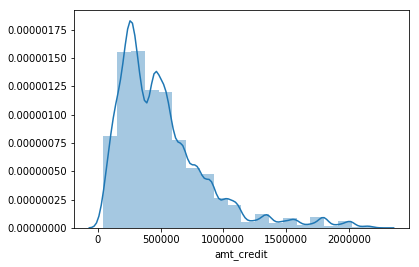

In [20]:
#amt_credit - valor do emprestimo
print(description['description'][8])
print(test.amt_credit.isnull().sum())
sns.distplot(test.amt_credit, kde=True, bins=20)

In [21]:
#amt_annuity
print(description['description'][9])
print(test.amt_annuity.isnull().sum())
test.amt_annuity.describe()

Loan annuity
24


count     48720.000000
mean      29426.240209
std       16016.368315
min        2295.000000
25%       17973.000000
50%       26199.000000
75%       37390.500000
max      180576.000000
Name: amt_annuity, dtype: float64

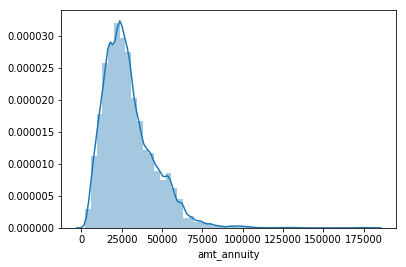

In [22]:
sns.distplot(test.amt_annuity.dropna(), kde=True)

For consumer loans it is the price of the goods for which the loan is given
0


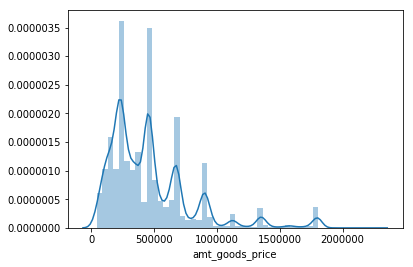

In [23]:
#amt_goods_price - preço dos bens para o qual vai ser feito o empréstimo
print(description['description'][10])
print(test.amt_goods_price.isnull().sum())
sns.distplot(test.amt_goods_price.dropna(), kde=True)

In [24]:
#name_type_suite - pessoa que estava acompanhando o cliente na hora de pedir o emprésdescription['description']timo
print(description['description'][11])
print(test.name_type_suite.isnull().sum())
test.groupby(test.name_type_suite).describe()

Who was accompanying client when he was applying for the loan
911


amt_annuity                                                \
                      count          mean           std     min       25%   
name_type_suite                                                             
Children              408.0  28128.187500  14064.242192  5350.5  17905.50   
Family               5878.0  29378.449813  15235.630992  3361.5  18798.75   
Group of people        49.0  28745.265306  17128.296695  6750.0  15196.50   
Other_A               109.0  31399.513761  14902.320885  5472.0  19615.50   
Other_B               211.0  29421.981043  14032.273038  4594.5  20569.50   
Spouse, partner      1448.0  33124.412983  16055.563394  4855.5  21879.00   
Unaccompanied       39706.0  29315.524946  16134.080273  2295.0  17775.00   

                                               amt_credit                 \
                      50%        75%       max      count           mean   
name_type_suite                                                            
Children         25535.25  34308.000   77089.5      408.0  511828.036765   
Family           26311.50  36921.375  177696.0     5881.0  521541.946523   
Group of people  23539.50  38299.500   79708.5       49.0  539914.683673   
Other_A          29511.00  40221.000   69714.0      109.0  491450.944954   
Other_B          26613.00  35498.250   77674.5      211.0  473665.158768   
Spouse, partner  29587.50  42189.750  106452.0     1448.0  592738.178867   
Unaccompanied    26059.50  37347.750  180576.0    39727.0  513783.266871   

                                                                         \
                           std      min        25%       50%        75%   
name_type_suite                                                           
Children         353100.663348  45000.0  269982.00  440784.0  661358.25   
Family           355875.027931  45000.0  270000.00  450000.0  675000.00   
Group of people  456654.081915  69651.0  248760.00  400500.0  746280.00   
Other_A          332089.074821  52128.0  260640.00  420367.5  632664.00   
Other_B          326120.083881  90000.0  272774.25  407520.0  568800.00   
Spouse, partner  397960.637901  45000.0  296280.00  509400.0  781920.00   
Unaccompanied    365508.590681  45000.0  260640.00  450000.0  675000.00   

                           amt_goods_price                                \
                       max           count           mean            std   
name_type_suite                                                            
Children         2013840.0           408.0  452545.522059  324760.050917   
Family           2156400.0          5881.0  465425.745962  325301.039814   
Group of people  1928304.0            49.0  484071.428571  430962.621639   
Other_A          1893010.5           109.0  436087.155963  300160.295478   
Other_B          2013840.0           211.0  419245.635071  299655.043009   
Spouse, partner  2156400.0          1448.0  527736.188536  364137.894795   
Unaccompanied    2245500.0         39727.0  460529.267123  337372.790776   

                                                                   \
                     min       25%       50%       75%        max   
name_type_suite                                                     
Children         45000.0  225000.0  360000.0  585000.0  1800000.0   
Family           45000.0  225000.0  409500.0  630000.0  1800000.0   
Group of people  63000.0  225000.0  328500.0  675000.0  1800000.0   
Other_A          45000.0  225000.0  373500.0  540000.0  1692000.0   
Other_B          90000.0  225000.0  360000.0  463500.0  1800000.0   
Spouse, partner  45000.0  247500.0  450000.0  675000.0  1800000.0   
Unaccompanied    45000.0  225000.0  387000.0  625500.0  2245500.0   

                amt_income_total                                         \
                           count           mean            std      min   
name_type_suite                                                           
Children                   408.0  160036.764706  100192.

In [25]:
#name_income_type - de onde vem a grana
print(description['description'][12])
print(test.name_income_type.isnull().sum())
test.groupby(test.name_income_type).describe()

Clients income type (businessman, working, maternity leave,)
0


amt_annuity                                       \
                           count          mean           std      min   
name_income_type                                                        
Businessman                  1.0  15750.000000           NaN  15750.0   
Commercial associate     11394.0  33400.516588  17613.537516   3321.0   
Pensioner                 9270.0  24888.231068  13655.997218   2439.0   
State servant             3530.0  31079.362181  16677.930906   4032.0   
Student                      2.0  29135.250000   2313.299835  27499.5   
Unemployed                   1.0  19125.000000           NaN  19125.0   
Working                  24522.0  29058.141302  15470.526539   2295.0   

                                                               amt_credit  \
                            25%       50%        75%       max      count   
name_income_type                                                            
Businessman           15750.000  15750.00  15750.000   15750.0        1.0   
Commercial associate  20808.000  29724.75  43659.000  180576.0    11402.0   
Pensioner             15642.000  22837.50  30699.000  173704.5     9273.0   
State servant         19066.500  27841.50  40243.500  180576.0     3532.0   
Student               28317.375  29135.25  29953.125   30771.0        2.0   
Unemployed            19125.000  19125.00  19125.000   19125.0        1.0   
Working               18081.000  26064.00  36400.500  177826.5    24533.0   

                                                                        \
                               mean            std       min       25%   
name_income_type                                                         
Businessman           315000.000000            NaN  315000.0  315000.0   
Commercial associate  582918.027758  407162.438072   45000.0  285264.0   
Pensioner             454879.412164  311160.605951   45000.0  233833.5   
State servant         584790.558890  412080.425001   45000.0  280170.0   
Student               556848.000000  418901.370883  260640.0  408744.0   
Unemployed            382500.000000            NaN  382500.0  382500.0   
Working               499579.187197  350355.931024   45000.0  257391.0   

                                                    amt_goods_price  \
                           50%       75%        max           count   
name_income_type                                                      
Businessman           315000.0  315000.0   315000.0             1.0   
Commercial associate  494550.0  755779.5  2245500.0         11402.0   
Pensioner             371862.0  594121.5  2156400.0          9273.0   
State servant         490495.5  779409.0  2156400.0          3532.0   
Student               556848.0  704952.0   853056.0             2.0   
Unemployed            382500.0  382500.0   382500.0             1.0   
Working               440784.0  632664.0  2156400.0         24533.0   

                                                                        \
                               mean            std       min       25%   
name_income_type                                                         
Businessman           315000.000000            NaN  315000.0  315000.0   
Commercial associate  523921.879670  376087.546240   45000.0  238500.0   
Pensioner             403548.893885  283300.627364   45000.0  225000.0   
State servant         523419.339751  379806.716849   45000.0  234000.0   
Student               472500.000000  350017.856687  225000.0  348750.0   
Unemployed            382500.000000            NaN  382500.0  382500.0   
Working               447709.900420  323429.586704   45000.0  225000.0   

                                                    amt_income_total  \
                           50%       75%        max            count   
name_income_type                                                       
Businessman           315000.0  315000.0   315000.0              1.0   
Commercial associate  450000.0  675000

In [26]:
#name_education_type - grau de escolaridade
print(description['description'][13])
print(test.name_education_type.isnull().sum())
test.groupby(test.name_education_type).describe()

Level of highest education the client achieved
0


amt_annuity                                      \
                                    count          mean           std     min   
name_education_type                                                             
Academic degree                      41.0  35605.536585  18179.112693  7218.0   
Higher education                  12508.0  33683.876479  18398.333516  2439.0   
Incomplete higher                  1722.0  30470.793554  16990.525034  4162.5   
Lower secondary                     475.0  24114.997895  13270.731811  4257.0   
Secondary / secondary special     33974.0  27872.588995  14703.669924  2295.0   

                                                                         \
                                     25%       50%        75%       max   
name_education_type                                                       
Academic degree                25128.000  33777.00  43785.000   95652.0   
Higher education               20552.625  29547.00  44244.000  180576.0   
Incomplete higher              18040.500  27276.75  39313.125  173574.0   
Lower secondary                15275.250  21955.50  29650.500  106582.5   
Secondary / secondary special  17460.000  25128.00  34956.000  177826.5   

                              amt_credit                                \
                                   count           mean            std   
name_education_type                                                      
Academic degree                     41.0  611163.219512  387881.207149   
Higher education                 12516.0  614040.309204  436692.137495   
Incomplete higher                 1724.0  492277.489559  348882.815215   
Lower secondary                    475.0  403405.882105  267663.577862   
Secondary / secondary special    33988.0  483620.848623  330318.739186   

                                                                       \
                                   min       25%       50%        75%   
name_education_type                                                     
Academic degree                67500.0  407520.0  494550.0  746280.00   
Higher education               45000.0  283500.0  502186.5  792162.00   
Incomplete higher              45000.0  247500.0  432594.0  648510.75   
Lower secondary                49752.0  225000.0  334152.0  539100.00   
Secondary / secondary special  45000.0  252531.0  423000.0  622413.00   

                                         amt_goods_price                 \
                                     max           count           mean   
name_education_type                                                       
Academic degree                2013840.0            41.0  569414.634146   
Higher education               2245500.0         12516.0  557264.060882   
Incomplete higher              2156400.0          1724.0  444140.981729   
Lower secondary                1942560.0           475.0  356187.732632   
Secondary / secondary special  2160000.0         33988.0  430061.832073   

                                                                           \
                                         std      min       25%       50%   
name_education_type                                                         
Academic degree                361554.904241  67500.0  360000.0  454500.0   
Higher education               405507.231244  45000.0  238500.0  450000.0   
Incomplete higher              318319.538993  45000.0  225000.0  373500.0   
Lower secondary                240651.038072  45000.0  204750.0  292500.0   
Secondary / secondary special  302324.510713  45000.0  225000.0  360000.0   

                                                   amt_income_total  \
                                    75%        max            count   
name_education_type                                                   
Academic degree                702000.0  1800000.0             41.0   
Higher education               675000.0  2245500.0          12516.0   
Incomplete higher            

In [27]:
#name_family_status - estado civil
print(description['description'][14])
print(test.name_family_status.isnull().sum())
test.groupby(test.name_family_status).describe()

Family status of the client
0


amt_annuity                                               \
                           count          mean           std     min      25%   
name_family_status                                                              
Civil marriage            4257.0  26302.788584  13650.379140  2596.5  16699.5   
Married                  32271.0  31298.445989  16725.273893  2295.0  19269.0   
Separated                 2952.0  26092.753049  14399.383939  3294.0  16200.0   
Single / not married      7032.0  26177.377986  13875.209276  2983.5  16636.5   
Widow                     2208.0  22888.665082  12700.479067  2425.5  14377.5   

                                                    amt_credit                 \
                           50%        75%       max      count           mean   
name_family_status                                                              
Civil marriage        23746.50  32683.500  103455.0     4261.0  437571.821638   
Married               27868.50  40374.000  180576.0    32283.0  561807.735573   
Separated             23532.75  32166.000  133848.0     2955.0  453748.009645   
Single / not married  23755.50  32455.125  176062.5     7036.0  419076.541714   
Widow                 20819.25  27956.250  106582.5     2209.0  406163.519919   

                                                                            \
                                std      min       25%       50%       75%   
name_family_status                                                           
Civil marriage        295645.318839  45000.0  229500.0  360000.0  550980.0   
Married               390135.910043  45000.0  272520.0  472500.0  729792.0   
Separated             314007.542431  45000.0  225000.0  383760.0  573408.0   
Single / not married  281210.504274  45000.0  225000.0  360000.0  539100.0   
Widow                 282605.064996  45000.0  225000.0  328405.5  535500.0   

                                amt_goods_price                                \
                            max           count           mean            std   
name_family_status                                                              
Civil marriage        2156400.0          4261.0  387095.857076  268754.104250   
Married               2245500.0         32283.0  505275.558545  360755.207856   
Separated             2156400.0          2955.0  402560.036041  284053.179908   
Single / not married  2160000.0          7036.0  370966.830657  255774.073745   
Widow                 2156400.0          2209.0  357165.653916  252892.993580   

                                                                        \
                          min       25%       50%       75%        max   
name_family_status                                                       
Civil marriage        45000.0  225000.0  315000.0  463500.0  1800000.0   
Married               45000.0  234000.0  450000.0  675000.0  2245500.0   
Separated             45000.0  225000.0  360000.0  495000.0  1800000.0   
Single / not married  45000.0  225000.0  315000.0  454500.0  2160000.0   
Widow                 45000.0  193500.0  270000.0  454500.0  1800000.0   

                     amt_income_total                                         \
                                count           mean            std      min   
name_family_status                                                             
Civil marriage                 4261.0  178075.050810   92983.859151  33750.0   
Married                       32283.0  179687.942294  102495.812996  26941.5   
Separated                      2955.0  184071.074619  124317.709638  31500.0   
Single / not married           7036.0  177764.611569   96591.212997  30150.0   
Widow                          2209.0  155343.811453   79067.506068  31500.0   

                                                               \
                           25%       50%       75%        max   
name_family_status                                              
Civil marriage      

In [28]:
#name_housing_type - mora com quem
print(description['description'][15])
print(test.name_housing_type.isnull().sum())
test.groupby(test.name_housing_type).describe()

What is the housing situation of the client (renting, living with parents, ...)
0


amt_annuity                                      \
                          count          mean           std     min   
name_housing_type                                                     
Co-op apartment           122.0  28026.295082  13615.493973  6583.5   
House / apartment       43627.0  29524.209744  16090.473058  2295.0   
Municipal apartment      1616.0  28778.594369  15476.481207  2439.0   
Office apartment          407.0  30715.805897  16047.860545  4293.0   
Rented apartment          716.0  29819.344274  16594.796368  3519.0   
With parents             2232.0  27695.485887  14716.062174  3555.0   

                                                              amt_credit  \
                           25%       50%        75%       max      count   
name_housing_type                                                          
Co-op apartment      18222.750  26093.25  34165.125   74110.5      123.0   
House / apartment    18045.000  26248.50  37516.500  180576.0    43645.0   
Municipal apartment  17527.500  25614.00  36679.500  103149.0     1617.0   
Office apartment     19174.500  27270.00  39651.750   95836.5      407.0   
Rented apartment     17791.875  26691.75  38673.000  134473.5      718.0   
With parents         17377.875  25011.00  35343.000  176062.5     2234.0   

                                                                      \
                              mean            std      min       25%   
name_housing_type                                                      
Co-op apartment      465971.085366  308783.929015  63000.0  271066.5   
House / apartment    522227.212831  369060.475129  45000.0  260640.0   
Municipal apartment  510530.448980  361688.051905  45000.0  260640.0   
Office apartment     507744.254300  329927.238713  55692.0  265194.0   
Rented apartment     472887.338440  319690.665186  45000.0  229500.0   
With parents         432570.226947  302193.737966  45000.0  225000.0   

                                                   amt_goods_price  \
                          50%       75%        max           count   
name_housing_type                                                    
Co-op apartment      407520.0  550980.0  2013840.0           123.0   
House / apartment    450000.0  675000.0  2245500.0         43645.0   
Municipal apartment  450000.0  651600.0  2156400.0          1617.0   
Office apartment     439740.0  675000.0  1800000.0           407.0   
Rented apartment     414612.0  601470.0  2013840.0           718.0   
With parents         360000.0  550980.0  2156400.0          2234.0   

                                                                      \
                              mean            std      min       25%   
name_housing_type                                                      
Co-op apartment      414804.878049  288762.074009  63000.0  225000.0   
House / apartment    467734.005923  340236.106449  45000.0  225000.0   
Municipal apartment  450798.776438  327717.545450  45000.0  225000.0   
Office apartment     453635.159705  304715.387972  45000.0  225000.0   
Rented apartment     424654.596100  294940.124269  45000.0  225000.0   
With parents         387711.700985  279843.201445  45000.0  225000.0   

                                                   amt_income_total  \
                          50%       75%        max            count   
name_housing_type                                                     
Co-op apartment      373500.0  479250.0  1800000.0            123.0   
House / apartment    405000.0  630000.0  2245500.0          43645.0   
Municipal apartment  382500.0  585000.0  1800000.0           1617.0   
Office apartment     364500.0  634500.0  1800000.0            407.0   
Rented apartment     360000.0  515250.0  1800000.0            718.0   
With parents         315000.0  472500.0  1800000.0           2234.0   

                                                                      \
                              mean            std     

Normalized population of region where client lives (higher number means the client lives in more populated region)
0


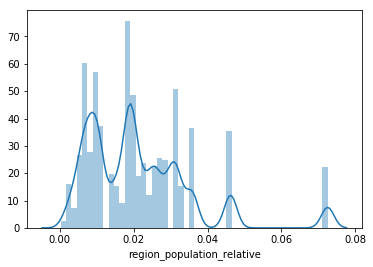

In [29]:
#region_population_relative - populacao de onde a pessoa mora
print(description['description'][16])
print(test.region_population_relative.isnull().sum())
sns.distplot(test.region_population_relative, kde=True)

Client's age in days at the time of application
0


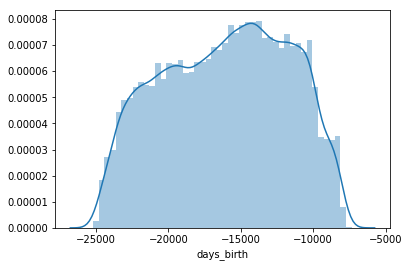

In [30]:
#days_birth
print(description['description'][17])
print(test.days_birth.isnull().sum())
sns.distplot(test.days_birth, kde=True)

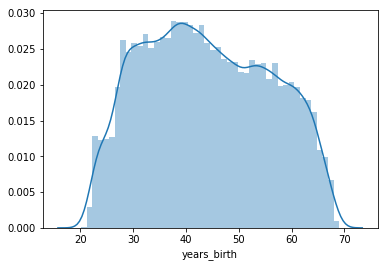

In [31]:
#years_birth - idade nova feature
test['years_birth'] = test['days_birth']/365*(-1)
sns.distplot(test.years_birth, kde=True)

How many days before the application the person started current employment
0


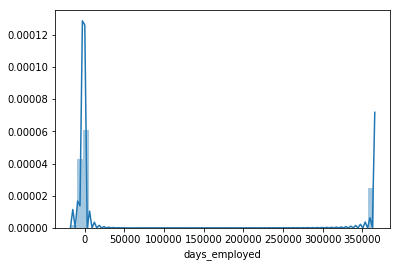

In [32]:
#days_employed - ha quantos dias a pessoa trabalha no emprego atual
print(description['description'][18])
print(test.days_employed.isnull().sum())
sns.distplot(test.days_employed, kde=True)

How many days before the application did client change his registration
0


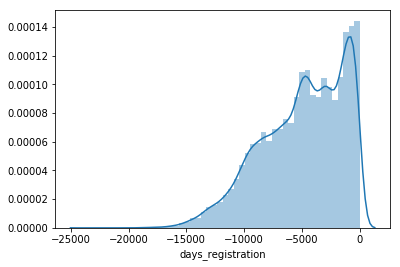

In [34]:
#days_registration - quantos dias antes do emprestimo o cliente mudou o seu registro... do que??
print(description['description'][19])
print(test.days_registration.isnull().sum())
sns.distplot(test.days_registration, kde=True)

How many days before the application did client change the identity document with which he applied for the loan
0


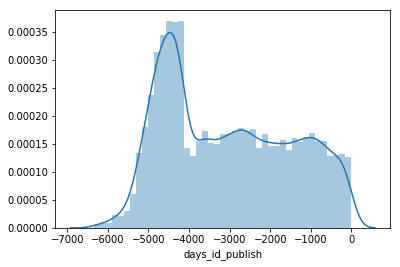

In [35]:
#days_id_publish - qntos dias antes o cliente mudou de documento de identidade
print(description['description'][20])
print(test.days_id_publish.isnull().sum())
sns.distplot(test.days_id_publish, kde=True)

Age of client's car
32312


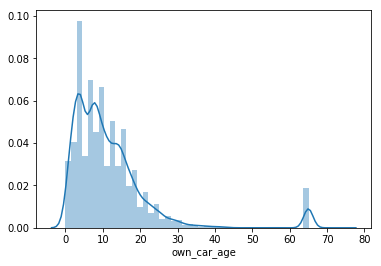

In [36]:
#own_car_age - idade do carro - transformar em categorico
print(description['description'][21])
print(test.own_car_age.isnull().sum())
test.own_car_age.describe()
sns.distplot(test.own_car_age.dropna(), kde=True)

In [43]:
#flag_mobil - possui celular ou nao
print(description['description'][22])
print(test.flag_mobil.isnull().sum())
test.groupby(test.flag_mobil).describe()

Did client provide mobile phone (1=YES, 0=NO)
0


amt_annuity                                                         \
                 count          mean           std      min      25%      50%   
flag_mobil                                                                      
0                  1.0  55899.000000           NaN  55899.0  55899.0  55899.0   
1              48719.0  29425.696833  16016.083611   2295.0  17973.0  26199.0   

                              amt_credit                              \
                75%       max      count          mean           std   
flag_mobil                                                             
0           55899.0   55899.0        1.0  1.354500e+06           NaN   
1           37390.5  180576.0    48743.0  5.167232e+05  365381.04833   

                                                                   \
                  min        25%        50%        75%        max   
flag_mobil                                                          
0           1354500.0  1354500.0  1354500.0  1354500.0  1354500.0   
1             45000.0   260640.0   450000.0   675000.0  2245500.0   

           amt_goods_price                                                     \
                     count          mean            std        min        25%   
flag_mobil                                                                      
0                      1.0  1.354500e+06            NaN  1354500.0  1354500.0   
1                  48743.0  4.626005e+05  336689.433948    45000.0   225000.0   

                                            amt_income_total                 \
                  50%        75%        max            count           mean   
flag_mobil                                                                    
0           1354500.0  1354500.0  1354500.0              1.0  225000.000000   
1            396000.0   630000.0  2245500.0          48743.0  178430.850473   

                                                                              \
                      std       min       25%       50%       75%        max   
flag_mobil                                                                     
0                     NaN  225000.0  225000.0  225000.0  225000.0   225000.0   
1           101523.413836   26941.5  112500.0  157500.0  225000.0  4410000.0   

           amt_req_credit_bureau_day                                          \
                               count      mean       std  min  25%  50%  75%   
flag_mobil                                                                     
0                                1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
1                            42694.0  0.001804  0.046133  0.0  0.0  0.0  0.0   

                amt_req_credit_bureau_hour                                     \
            max                      count      mean       std  min  25%  50%   
flag_mobil                                                                      
0           0.0                        1.0  0.000000       NaN  0.0  0.0  0.0   
1           2.0                    42694.0  0.002108  0.046373  0.0  0.0  0.0   

                     amt_req_credit_bureau_mon                                \
            75%  max                     count      mean       std  min  25%   
flag_mobil                                                                     
0           0.0  0.0                       1.0  0.000000       NaN  0.0  0.0   
1           0.0  2.0                   42694.0  0.009299  0.110925  0.0  0.0   

                          amt_req_credit_bureau_qrt                          \
            50%  75%  max                     count      mean      std  min   
flag_mobil                                                                    
0           0.0  0.0  0.0                       1.0  1.000000      NaN  1.0   
1           0.0  0.0  6.0                   42694.0  0.546892  0.69331  0.0   

                               amt_req_credit_bureau_week                      \
          

In [44]:
#flag_emp_phone - se o cliente deu o telefone de casa
print(description['description'][24])
print(test.flag_emp_phone.isnull().sum())
test.groupby(test.flag_emp_phone).describe()

Did client provide home phone (1=YES, 0=NO)
0


amt_annuity                                               \
                     count          mean           std     min      25%   
flag_emp_phone                                                            
0                   9272.0  24887.737759  13654.660924  2439.0  15642.0   
1                  39448.0  30492.986172  16340.752239  2295.0  18792.0   

                                           amt_credit                 \
                    50%      75%       max      count           mean   
flag_emp_phone                                                         
0               22837.5  30699.0  173704.5     9275.0  454857.972453   
1               27463.5  39244.5  180576.0    39469.0  531282.477299   

                                                                      \
                          std      min       25%       50%       75%   
flag_emp_phone                                                         
0               311130.731094  45000.0  233869.5  371862.0  594121.5   
1               375544.292419  45000.0  267102.0  450000.0  675000.0   

                          amt_goods_price                                \
                      max           count           mean            std   
flag_emp_phone                                                            
0               2156400.0          9275.0  403533.681186  283272.904738   
1               2245500.0         39469.0  476503.531050  346624.052116   

                                                                  \
                    min       25%       50%       75%        max   
flag_emp_phone                                                     
0               45000.0  225000.0  337500.0  495000.0  1800000.0   
1               45000.0  225000.0  427500.0  634500.0  2245500.0   

               amt_income_total                                         \
                          count           mean            std      min   
flag_emp_phone                                                           
0                        9275.0  146179.165391   77760.293574  27000.0   
1                       39469.0  186011.000674  104910.589553  26941.5   

                                                         \
                     25%       50%       75%        max   
flag_emp_phone                                            
0                90000.0  135000.0  180000.0  1800000.0   
1               121500.0  157500.0  225000.0  4410000.0   

               amt_req_credit_bureau_day                                     \
                                   count      mean       std  min  25%  50%   
flag_emp_phone                                                                
0                                 8155.0  0.001717  0.041400  0.0  0.0  0.0   
1                                34540.0  0.001824  0.047181  0.0  0.0  0.0   

                         amt_req_credit_bureau_hour                           \
                75%  max                      count      mean       std  min   
flag_emp_phone                                                                 
0               0.0  1.0                     8155.0  0.000858  0.029287  0.0   
1               0.0  2.0                    34540.0  0.002403  0.049550  0.0   

                                   amt_req_credit_bureau_mon            \
                25%  50%  75%  max                     count      mean   
flag_emp_phone                                                           
0               0.0  0.0  0.0  1.0                    8155.0  0.006131   
1               0.0  0.0  0.0  2.0                   34540.0  0.010046   

                                                  amt_req_credit_bureau_qrt  \
                     std  min  25%  50%  75%  max                     count   
flag_emp_phone                                                                
0               0.082645  0.0  0.0  0.0  0.0  2.0                    8155.0   
1               0.116592  0.0  0.0  0.0  0.0  6.0

In [42]:
#flag_work_phone - se o cliente due o telefone de trabalho
print(description['description'][23])
print(test.flag_work_phone.isnull().sum())
test.groupby(test.flag_work_phone).describe()

Did client provide work phone (1=YES, 0=NO)
0


amt_annuity                                               \
                      count          mean           std     min      25%   
flag_work_phone                                                            
0                   38755.0  29802.319817  16011.946239  2439.0  18409.5   
1                    9965.0  27963.624536  15950.269184  2295.0  16501.5   

                                            amt_credit                 \
                     50%      75%       max      count           mean   
flag_work_phone                                                         
0                26730.0  37687.5  180576.0    38766.0  523382.001238   
1                24565.5  35734.5  180576.0     9978.0  490936.974444   

                                                                       \
                           std      min       25%       50%       75%   
flag_work_phone                                                         
0                364972.889601  45000.0  266832.0  450000.0  675000.0   
1                365916.151392  45000.0  225000.0  431280.0  652500.0   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_work_phone                                                            
0                2156400.0         38766.0  464012.947764  334568.057784   
1                2245500.0          9978.0  457202.528262  344870.171845   

                                                                    \
                     min       25%        50%       75%        max   
flag_work_phone                                                      
0                45000.0  225000.0  400500.00  630000.0  1800000.0   
1                45000.0  225000.0  378330.75  630000.0  2245500.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_work_phone                                                           
0                        38766.0  178773.770084   96825.869226  27000.0   
1                         9978.0  177103.224444  118005.400722  26941.5   

                                                          \
                      25%       50%       75%        max   
flag_work_phone                                            
0                112500.0  157500.0  225000.0  2340000.0   
1                112500.0  157500.0  216000.0  4410000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_work_phone                                                                
0                                 33934.0  0.001768  0.044731  0.0  0.0  0.0   
1                                  8761.0  0.001940  0.051204  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_work_phone                                                                 
0                0.0  2.0                    33934.0  0.001915  0.044394  0.0   
1                0.0  2.0                     8761.0  0.002854  0.053345  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_work_phone                                                           
0                0.0  0.0  0.0  2.0                   33934.0  0.009194   
1                0.0  0.0  0.0  1.0                    8761.0  0.009702   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_work_phone                                                                
0                0.107362  0.0  0.0  0.0  0.0  5.0                   33

In [39]:
#flag_cont_mobile - se o telefone era alcancavel
print(description['description'][25])
print(test.flag_cont_mobile.isnull().sum())
test.groupby(test.flag_cont_mobile).describe()

Was mobile phone reachable (1=YES, 0=NO)
0


sk_id_curr                                          \
                      count           mean            std       min   
flag_cont_mobile                                                      
0                      78.0  277386.948718  100803.168907  100106.0   
1                   48666.0  277797.333046  103174.307131  100001.0   

                                                           cnt_children  \
                        25%       50%        75%       max        count   
flag_cont_mobile                                                          
0                 186554.25  294703.0  367825.75  449815.0         78.0   
1                 188561.50  277526.0  367553.00  456250.0      48666.0   

                                                                \
                      mean       std  min  25%  50%  75%   max   
flag_cont_mobile                                                 
0                 0.500000  0.716231  0.0  0.0  0.0  1.0   3.0   
1                 0.396889  0.709031  0.0  0.0  0.0  1.0  20.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_cont_mobile                                                           
0                            78.0  198865.384615  131258.658912  54000.0   
1                         48666.0  178399.055698  101466.377631  26941.5   

                                                          amt_credit  \
                       25%       50%       75%        max      count   
flag_cont_mobile                                                       
0                 135000.0  157500.0  225000.0   900000.0       78.0   
1                 112500.0  157500.0  225000.0  4410000.0    48666.0   

                                                                              \
                           mean            std       min       25%       50%   
flag_cont_mobile                                                               
0                 295248.230769  261656.106984  135000.0  157500.0  213750.0   
1                 517095.434780  365433.829543   45000.0  260640.0  450000.0   

                                      amt_annuity                              \
                       75%        max       count          mean           std   
flag_cont_mobile                                                                
0                 292500.0  1350000.0        78.0  14827.673077  13117.938694   
1                 675000.0  2245500.0     48642.0  29449.649778  16010.018842   

                                                              amt_goods_price  \
                     min      25%      50%      75%       max           count   
flag_cont_mobile                                                                
0                 6750.0   7875.0  10687.5  14625.0   67500.0            78.0   
1                 2295.0  18004.5  26230.5  37390.5  180576.0         48666.0   

                                                                             \
                           mean            std      min       25%       50%   
flag_cont_mobile                                                              
0                 292961.538462  262599.811194  67500.0  157500.0  213750.0   
1                 462890.760695  336749.411394  45000.0  225000.0  400500.0   

                                      region_population_relative            \
                       75%        max                      count      mean   
flag_cont_mobile                                                             
0                 292500.0  1350000.0                       78.0  0.022674   
1                 630000.0  2245500.0                    48666.0  0.021223   

                                                                              \
                       std       min       25%       50%       75%       max   
flag_cont_mobile                                    

In [40]:
#flag_phone - se o cliente deu o tel de casa
print(description['description'][26])
print(test.flag_phone.isnull().sum())
test.groupby(test.flag_phone).describe()

Did client provide home phone (1=YES, 0=NO)
0


amt_annuity                                                        \
                 count          mean           std     min      25%      50%   
flag_phone                                                                     
0              35908.0  29477.700777  15779.075382  2439.0  18211.5  26370.0   
1              12812.0  29282.012449  16663.214178  2295.0  17446.5  25578.0   

                                amt_credit                                \
                  75%       max      count           mean            std   
flag_phone                                                                 
0           37336.500  180576.0    35918.0  513035.637048  357458.115059   
1           37578.375  180576.0    12826.0  527115.373421  386588.530877   

                                                             amt_goods_price  \
                min       25%       50%       75%        max           count   
flag_phone                                                                     
0           45000.0  260640.0  450000.0  675000.0  2245500.0         35918.0   
1           45000.0  248760.0  450000.0  675000.0  2160000.0         12826.0   

                                                                       \
                     mean            std      min       25%       50%   
flag_phone                                                              
0           455527.512445  327466.269603  45000.0  225000.0  382500.0   
1           482477.433962  360612.870092  45000.0  225000.0  450000.0   

                                amt_income_total                 \
                 75%        max            count           mean   
flag_phone                                                        
0           603000.0  2245500.0          35918.0  177474.028022   
1           675000.0  2160000.0          12826.0  181113.972095   

                                                                             \
                      std      min       25%       50%       75%        max   
flag_phone                                                                    
0            96489.651330  26941.5  112500.0  157500.0  225000.0  3150000.0   
1           114406.534218  27000.0  112500.0  157500.0  225000.0  4410000.0   

           amt_req_credit_bureau_day                                          \
                               count      mean       std  min  25%  50%  75%   
flag_phone                                                                     
0                            31218.0  0.001986  0.047312  0.0  0.0  0.0  0.0   
1                            11477.0  0.001307  0.042757  0.0  0.0  0.0  0.0   

                amt_req_credit_bureau_hour                                     \
            max                      count      mean       std  min  25%  50%   
flag_phone                                                                      
0           2.0                    31218.0  0.002146  0.046965  0.0  0.0  0.0   
1           2.0                    11477.0  0.002004  0.044723  0.0  0.0  0.0   

                     amt_req_credit_bureau_mon                                \
            75%  max                     count      mean       std  min  25%   
flag_phone                                                                     
0           0.0  2.0                   31218.0  0.009290  0.113382  0.0  0.0   
1           0.0  1.0                   11477.0  0.009323  0.103949  0.0  0.0   

                          amt_req_credit_bureau_qrt                           \
            50%  75%  max                     count      mean       std  min   
flag_phone                                                                     
0           0.0  0.0  6.0                   31218.0  0.554071  0.698371  0.0   
1           0.0  0.0  3.0                   11477.0  0.527403  0.678982  0.0   

                               amt_req_credit_bureau_week                      \
            25%  50%  75%  max          

In [41]:
#flag_email - se o cliente deu um email
print(description['description'][27])
print(test.flag_email.isnull().sum())
test.groupby(test.flag_email).describe()

Did client provide email (1=YES, 0=NO)
0


amt_annuity                                                        \
                 count          mean           std     min      25%      50%   
flag_email                                                                     
0              40793.0  28896.197497  15768.349108  2425.5  17770.5  25618.5   
1               7927.0  32153.884004  16977.671209  2295.0  20299.5  28741.5   

                              amt_credit                                \
                75%       max      count           mean            std   
flag_email                                                               
0           36517.5  180576.0    40816.0  506918.136111  357375.570431   
1           41701.5  177826.5     7928.0  567308.923751  400410.977704   

                                                             amt_goods_price  \
                min       25%       50%       75%        max           count   
flag_email                                                                     
0           45000.0  256500.0  450000.0  675000.0  2245500.0         40816.0   
1           45000.0  278460.0  478498.5  732955.5  2156400.0          7928.0   

                                                                       \
                     mean            std      min       25%       50%   
flag_email                                                              
0           455069.277452  330210.276639  45000.0  225000.0  382500.0   
1           501486.520119  365928.566598  45000.0  238500.0  450000.0   

                                amt_income_total                 \
                 75%        max            count           mean   
flag_email                                                        
0           607500.0  2245500.0          40816.0  173686.294715   
1           675000.0  1800000.0           7928.0  202863.287021   

                                                                             \
                      std      min       25%       50%       75%        max   
flag_email                                                                    
0            97499.329794  26941.5  112500.0  157500.0  205762.5  3150000.0   
1           117123.821647  31500.0  135000.0  180000.0  225000.0  4410000.0   

           amt_req_credit_bureau_day                                          \
                               count      mean       std  min  25%  50%  75%   
flag_email                                                                     
0                            35698.0  0.001737  0.046109  0.0  0.0  0.0  0.0   
1                             6997.0  0.002144  0.046255  0.0  0.0  0.0  0.0   

                amt_req_credit_bureau_hour                                     \
            max                      count      mean       std  min  25%  50%   
flag_email                                                                      
0           2.0                    35698.0  0.001961  0.044868  0.0  0.0  0.0   
1           1.0                     6997.0  0.002858  0.053391  0.0  0.0  0.0   

                     amt_req_credit_bureau_mon                                \
            75%  max                     count      mean       std  min  25%   
flag_email                                                                     
0           0.0  2.0                   35698.0  0.009244  0.108075  0.0  0.0   
1           0.0  1.0                    6997.0  0.009576  0.124453  0.0  0.0   

                          amt_req_credit_bureau_qrt                           \
            50%  75%  max                     count      mean       std  min   
flag_email                                                                     
0           0.0  0.0  6.0                   35698.0  0.539890  0.689032  0.0   
1           0.0  0.0  5.0                    6997.0  0.582678  0.713688  0.0   

                               amt_req_credit_bureau_week                      \
            25%  50%  75%  max                    

In [45]:
#occupation_type - trabalho cargo
print(description['description'][28])
print(test.occupation_type.isnull().sum())
test.groupby(test.occupation_type).describe()

What kind of occupation does the client have
15605


amt_annuity                                      \
                            count          mean           std     min   
occupation_type                                                         
Accountants                1626.0  33888.462177  18050.573854  2983.5   
Cleaning staff              655.0  26093.081679  12559.115520  4392.0   
Cooking staff               893.0  28111.918253  15117.550905  4257.0   
Core staff                 4360.0  29963.080734  16323.070404  4126.5   
Drivers                    2770.0  32223.432671  15980.196513  2295.0   
HR staff                    104.0  33315.447115  17222.167442  9004.5   
High skill tech staff      1853.0  30896.941716  16304.065308  2425.5   
IT staff                     81.0  29387.222222  15543.659256  6538.5   
Laborers                   8651.0  28342.157381  14154.889576  2439.0   
Low-skill Laborers          271.0  25477.970480  12203.107864  4725.0   
Managers                   3574.0  39273.114158  20575.975873  3343.5   
Medicine staff             1316.0  27714.922112  14296.093912  3685.5   
Private service staff       455.0  33134.835165  16515.946482  3519.0   
Realty agents               138.0  33550.858696  17712.888742  4725.0   
Sales staff                5071.0  28884.747486  14837.301702  3361.5   
Secretaries                 213.0  28031.471831  16000.203026  4581.0   
Security staff              913.0  26511.358160  14564.482720  3294.0   
Waiters/barmen staff        178.0  28113.977528  12789.267224  5278.5   

                                                                amt_credit  \
                             25%       50%        75%       max      count   
occupation_type                                                              
Accountants            21496.500  29884.50  44273.250  180576.0     1628.0   
Cleaning staff         17217.000  24421.50  32712.750   84694.5      656.0   
Cooking staff          17775.000  25272.00  35509.500  173704.5      894.0   
Core staff             18280.125  26835.75  38309.625  180576.0     4361.0   
Drivers                21200.625  29369.25  41459.625  177826.5     2773.0   
HR staff               19927.125  29931.75  42818.625   87808.5      104.0   
High skill tech staff  18819.000  27796.50  40374.000  130311.0     1854.0   
IT staff               18567.000  26248.50  37129.500   71010.0       81.0   
Laborers               17905.500  25776.00  35662.500  173704.5     8655.0   
Low-skill Laborers     17102.250  23539.50  31410.000   97069.5      272.0   
Managers               24550.875  36236.25  51409.125  177826.5     3574.0   
Medicine staff         17905.500  25128.00  34308.000  103455.0     1316.0   
Private service staff  20720.250  30073.50  44626.500  103653.0      455.0   
Realty agents          19363.500  31716.00  46084.500   96610.5      138.0   
Sales staff            18092.250  25906.50  36227.250  130311.0     5072.0   
Secretaries            16200.000  25042.50  35343.000   92727.0      213.0   
Security staff         16501.500  23755.50  32746.500   98289.0      915.0   
Waiters/barmen staff   18749.250  26309.25  35427.375   63504.0      178.0   

                                                                          \
                                mean            std      min         25%   
occupation_type                                                            
Accountants            648432.395270  445537.927749  45000.0  296876.250   
Cleaning staff         451916.643293  288413.379571  45000.0  248445.000   
Cooking staff          471019.751678  313130.157962  45000.0  255447.000   
Core staff             545518.918253  392536.904272  45000.0  265536.000   
Drivers                517384.413451  340254.576823  45000.0  276277.500   
HR staff               597066.100962  397847.732202  99000.0  327690.000   
High skill tech staff  561715.026699  411719.879091  45000.0  269982.000   
IT staff               512415.500000  403137.547516  62554.5  248760.000   
Laborers     

In [46]:
#cnt_fam_members - quantos membros de familia
print(description['description'][29])
print(test.cnt_fam_members.isnull().sum())
test.groupby(test.cnt_fam_members).describe()

How many family members does client have
0


amt_annuity                                                  \
                      count          mean           std      min        25%   
cnt_fam_members                                                               
1.0                 10244.0  25405.175664  13835.235111   2425.5  16072.875   
2.0                 26042.0  30048.023040  16143.409022   2295.0  18508.500   
3.0                  8170.0  31245.580355  16874.710479   3478.5  19066.500   
4.0                  3688.0  31659.042299  16762.192837   2439.0  19372.500   
5.0                   512.0  32941.942383  16996.443230   5080.5  21460.500   
6.0                    43.0  30129.383721  12930.854550  10638.0  19075.500   
7.0                    12.0  35314.500000  17920.377350  11358.0  23279.625   
8.0                     2.0  21984.750000   2014.193666  20560.5  21272.625   
9.0                     1.0  31279.500000           NaN  31279.5  31279.500   
10.0                    3.0  31650.000000  29963.297336  10296.0  14523.750   
13.0                    2.0  26982.000000  12836.109399  17905.5  22443.750   
21.0                    1.0  40473.000000           NaN  40473.0  40473.000   

                                               amt_credit                 \
                      50%        75%       max      count           mean   
cnt_fam_members                                                            
1.0              23107.50  31155.750  176062.5    10251.0  422311.019754   
2.0              26833.50  38314.125  180576.0    26054.0  541099.766044   
3.0              27796.50  40374.000  177826.5     8173.0  539896.222501   
4.0              28570.50  41904.000  135913.5     3690.0  547933.024390   
5.0              30451.50  42449.625  118620.0      512.0  575127.474609   
6.0              29295.00  41474.250   57478.5       43.0  503318.511628   
7.0              30417.75  43495.875   75015.0       12.0  571518.375000   
8.0              21984.75  22696.875   23409.0        2.0  259524.000000   
9.0              31279.50  31279.500   31279.5        1.0  339633.000000   
10.0             18751.50  42327.000   65902.5        3.0  511332.000000   
13.0             26982.00  31520.250   36058.5        2.0  464364.000000   
21.0             40473.00  40473.000   40473.0        1.0  339948.000000   

                                                                            \
                           std       min         25%        50%        75%   
cnt_fam_members                                                              
1.0              287491.322641   45000.0  225000.000  360000.00  539100.00   
2.0              377199.906441   45000.0  270000.000  450000.00  675526.50   
3.0              384623.376441   45000.0  269982.000  450000.00  684652.50   
4.0              384578.065404   45000.0  270000.000  450000.00  719651.25   
5.0              389710.777067   52128.0  281068.875  495000.00  746280.00   
6.0              299861.306980  135000.0  270000.000  483237.00  579942.00   
7.0              264310.946628  104256.0  438750.000  560099.25  688698.00   
8.0               51980.833699  222768.0  241146.000  259524.00  277902.00   
9.0                        NaN  339633.0  339633.000  339633.00  339633.00   
10.0             387481.367789  199152.0  294498.000  389844.00  667422.00   
13.0             338511.815144  225000.0  344682.000  464364.00  584046.00   
21.0                       NaN  339948.0  339948.000  339948.00  339948.00   

                           amt_goods_price                                \
                       max           count           mean            std   
cnt_fam_members                                                            
1.0              2160000.0         10251.0  373955.070237  260469.338294   
2.0              2245500.0         26054.0  486344.018730  349091.837662   
3.0              2156400.0          8173.0  482138.654778  353080.208963   
4.0              2156400.0          3690.0  491158.673171  354

In [47]:
#region_rating_client - rating da empresa
print(description['description'][30])
print(test.region_rating_client.isnull().sum())
test.groupby(test.region_rating_client).describe()

Our rating of the region where client lives (1,2,3)
0


amt_annuity                                      \
                           count          mean           std     min   
region_rating_client                                                   
1                         5756.0  37900.392373  19186.790777  4176.0   
2                        35341.0  28259.872414  15161.812258  2295.0   
3                         7623.0  28434.948642  15307.985146  3321.0   

                                                             amt_credit  \
                            25%      50%       75%       max      count   
region_rating_client                                                      
1                     23995.125  34695.0  49299.75  180576.0     5764.0   
2                     17532.000  25402.5  35554.50  180576.0    35356.0   
3                     17667.000  25402.5  35685.00  176062.5     7624.0   

                                                                       \
                               mean            std      min       25%   
region_rating_client                                                    
1                     673534.871357  446893.235573  45000.0  334152.0   
2                     494339.501796  347210.701140  45000.0  252229.5   
3                     502082.026102  349969.441407  45000.0  260640.0   

                                                      amt_goods_price  \
                           50%         75%        max           count   
region_rating_client                                                    
1                     550980.0  887842.125  2245500.0          5764.0   
2                     431280.0  632664.000  2160000.0         35356.0   
3                     439074.0  630000.000  2156400.0          7624.0   

                                                                       \
                               mean            std      min       25%   
region_rating_client                                                    
1                     605886.670368  411032.420620  45000.0  292500.0   
2                     443139.089179  321500.421315  45000.0  225000.0   
3                     444640.130509  316571.862357  45000.0  225000.0   

                                                    amt_income_total  \
                           50%       75%        max            count   
region_rating_client                                                   
1                     477000.0  778500.0  2245500.0           5764.0   
2                     360000.0  567000.0  2160000.0          35356.0   
3                     360000.0  567000.0  1800000.0           7624.0   

                                                                       \
                               mean            std      min       25%   
region_rating_client                                                    
1                     254315.845680  140364.515577  36000.0  180000.0   
2                     169916.114495   91546.200846  26941.5  112500.0   
3                     160552.107293   84437.747949  28800.0  112500.0   

                                                    amt_req_credit_bureau_day  \
                           50%       75%        max                     count   
region_rating_client                                                            
1                     225000.0  315000.0  4410000.0                    4919.0   
2                     157500.0  202500.0  2700000.0                   31145.0   
3                     135000.0  202500.0  1575000.0                    6631.0   

                                                                   \
                          mean       std  min  25%  50%  75%  max   
region_rating_client                                                
1                     0.001423  0.042755  0.0  0.0  0.0  0.0  2.0   
2                     0.001894  0.047709  0.0  0.0  0.0  0.0  2.0   
3                     0.001659  0.040699  0.0  0.0  0.0  0.0  1.0   

                     amt_req_credit_bureau_hou

In [48]:
#region_rating_client_w_city - rating da empresa da cidade
print(description['description'][31])
print(test.region_rating_client_w_city.isnull().sum())
test.groupby(test.region_rating_client_w_city).describe()

Our rating of the region where client lives with taking city into account (1,2,3)
0


amt_annuity                                       \
                                  count          mean           std      min   
region_rating_client_w_city                                                    
-1                                  1.0  16321.500000           NaN  16321.5   
 1                               6167.0  37864.337522  19140.832914   4176.0   
 2                              35761.0  28282.381841  15180.336171   2295.0   
 3                               6791.0  27788.908114  14831.672599   3321.0   

                                                                   amt_credit  \
                                  25%      50%       75%       max      count   
region_rating_client_w_city                                                     
-1                           16321.50  16321.5  16321.50   16321.5        1.0   
 1                           24005.25  34740.0  49248.00  180576.0     6175.0   
 2                           17541.00  25420.5  35554.50  180576.0    35776.0   
 3                           17262.00  24844.5  34872.75  146610.0     6792.0   

                                                                     \
                                      mean            std       min   
region_rating_client_w_city                                           
-1                           385164.000000            NaN  385164.0   
 1                           670896.673360  443019.246385   45000.0   
 2                           495300.210979  347832.117207   45000.0   
 3                           489541.125000  343144.119870   45000.0   

                                                                        \
                                   25%        50%       75%        max   
region_rating_client_w_city                                              
-1                           385164.00  385164.00  385164.0   385164.0   
 1                           334152.00  550980.00  886320.0  2245500.0   
 2                           254700.00  432578.25  634500.0  2160000.0   
 3                           248847.75  420588.00  622413.0  2156400.0   

                            amt_goods_price                                \
                                      count           mean            std   
region_rating_client_w_city                                                 
-1                                      1.0  292500.000000            NaN   
 1                                   6175.0  603007.654737  407127.763493   
 2                                  35776.0  443627.964781  321699.458722   
 3                                   6792.0  435040.330389  311901.006952   

                                                                      \
                                  min       25%       50%        75%   
region_rating_client_w_city                                            
-1                           292500.0  292500.0  292500.0  292500.00   
 1                            45000.0  292500.0  477000.0  769367.25   
 2                            45000.0  225000.0  360000.0  571500.00   
 3                            45000.0  225000.0  360000.0  540000.00   

                                       amt_income_total                 \
                                   max            count           mean   
region_rating_client_w_city                                              
-1                            292500.0              1.0  270000.000000   
 1                           2245500.0           6175.0  253954.013684   
 2                           2160000.0          35776.0  169641.321377   
 3                           1800000.0           6792.0  156059.481228   

                                                                          \
                                       std       min       25%       50%   
region_rating_client_w_city                                                
-1                                     NaN  270000.0  270000.0  270000.0   
 1            

In [49]:
#weekday_appr_process_start - dia da semana
print(description['description'][32])
print(test.weekday_appr_process_start.isnull().sum())
test.groupby(test.weekday_appr_process_start).describe()

On which day of the week did the client apply for the loan
0


amt_annuity                                      \
                                 count          mean           std     min   
weekday_appr_process_start                                                   
FRIDAY                          7244.0  28970.186223  15738.822844  3910.5   
MONDAY                          8402.0  29644.819031  16049.865204  2439.0   
SATURDAY                        4602.0  29088.486962  15866.972980  2425.5   
SUNDAY                          1859.0  28642.294244  15454.732643  2295.0   
THURSDAY                        8413.0  29235.752764  16034.324034  2439.0   
TUESDAY                         9749.0  29681.323315  15981.619053  2983.5   
WEDNESDAY                       8451.0  29851.588392  16421.554459  2596.5   

                                                                      \
                                  25%       50%        75%       max   
weekday_appr_process_start                                             
FRIDAY                      17775.000  25668.00  36613.125  173704.5   
MONDAY                      18046.125  26493.75  37516.500  180576.0   
SATURDAY                    17905.500  26059.50  36414.000  176062.5   
SUNDAY                      17430.750  25488.00  36420.750  109597.5   
THURSDAY                    17775.000  25834.50  37323.000  177826.5   
TUESDAY                     18270.000  26541.00  37786.500  180576.0   
WEDNESDAY                   18256.500  26644.50  38052.000  176062.5   

                           amt_credit                                         \
                                count           mean            std      min   
weekday_appr_process_start                                                     
FRIDAY                         7250.0  507377.226414  360933.404674  45000.0   
MONDAY                         8406.0  519365.051927  363936.844491  45000.0   
SATURDAY                       4603.0  508470.610689  366200.273884  45000.0   
SUNDAY                         1859.0  510971.569930  366286.343649  45000.0   
THURSDAY                       8418.0  515837.433357  366798.681938  45000.0   
TUESDAY                        9751.0  519406.887806  363661.538204  45000.0   
WEDNESDAY                      8457.0  525752.137460  370412.230937  45000.0   

                                                                     \
                                 25%       50%       75%        max   
weekday_appr_process_start                                            
FRIDAY                      254799.0  440784.0  667678.5  2156400.0   
MONDAY                      260640.0  450000.0  675000.0  2156400.0   
SATURDAY                    259794.0  450000.0  656811.0  2156400.0   
SUNDAY                      241393.5  450000.0  675000.0  2156400.0   
THURSDAY                    260640.0  450000.0  675000.0  2156400.0   
TUESDAY                     261387.0  450000.0  675000.0  2245500.0   
WEDNESDAY                   260640.0  450000.0  675000.0  2156400.0   

                           amt_goods_price                                \
                                     count           mean            std   
weekday_appr_process_start                                                 
FRIDAY                              7250.0  452564.722552  332169.218422   
MONDAY                              8406.0  464449.677195  335896.728865   
SATURDAY                            4603.0  456111.333370  335314.867181   
SUNDAY                              1859.0  463807.028779  337233.327388   
THURSDAY                            8418.0  462388.482894  337587.405992   
TUESDAY                             9751.0  464518.006051  335901.701788   
WEDNESDAY                           8457.0  470738.497694  341891.101028   

                                                                              \
                                min       25%       50%       75%        max   
weekday_appr_process_start                                                     
FRIDAY      

In [50]:
#hour_appr_process_start - hora
print(description['description'][33])
print(test.hour_appr_process_start.isnull().sum())
test.groupby(test.hour_appr_process_start).describe()

Approximately at what hour did the client apply for the loan
0


amt_annuity                                       \
                              count          mean           std      min   
hour_appr_process_start                                                    
0                               8.0  48620.250000  20044.277302  23908.5   
1                              19.0  30314.605263  14604.864086   5625.0   
2                              39.0  32939.423077  12834.678419  11110.5   
3                             240.0  30183.806250  14360.228281   5976.0   
4                             302.0  32041.892384  16247.964988   5742.0   
5                             554.0  31686.766245  16291.432220   5224.5   
6                            1013.0  29180.327739  14891.360389   4329.0   
7                            1306.0  29660.034074  16073.082236   3321.0   
8                            2573.0  28488.357948  15081.163428   3343.5   
9                            4337.0  27522.894397  15400.708771   2596.5   
10                           6471.0  28809.465229  15748.736358   4032.0   
11                           5932.0  29183.040121  15558.628162   2439.0   
12                           5413.0  29486.682708  16269.771763   2425.5   
13                           4715.0  29439.783563  15806.464901   2983.5   
14                           4194.0  29900.924893  16674.069120   2295.0   
15                           3761.0  29794.718958  15945.407516   3685.5   
16                           3105.0  29704.721739  15886.291512   2439.0   
17                           2354.0  30653.502974  16951.206581   3478.5   
18                           1442.0  31785.363037  17390.520803   5166.0   
19                            627.0  32520.193780  18637.525948   3375.0   
20                            214.0  30572.264019  16354.308677   4594.5   
21                             69.0  34051.500000  20908.460176   5467.5   
22                             25.0  35180.460000  20609.062860   6673.5   
23                              7.0  21236.142857   7063.242502  11488.5   

                                                                  amt_credit  \
                               25%       50%        75%       max      count   
hour_appr_process_start                                                        
0                        38799.000  46948.50  56953.125   86310.0        8.0   
1                        22083.750  28728.00  38333.250   62482.5       19.0   
2                        22173.750  32517.00  40902.750   62523.0       39.0   
3                        18803.250  28480.50  39458.250   87111.0      240.0   
4                        19689.750  28743.75  39868.875   94639.5      302.0   
5                        20164.500  28395.00  39361.500  123592.5      554.0   
6                        18549.000  26392.50  36090.000   92529.0     1013.0   
7                        18410.625  26835.75  37516.500  177826.5     1306.0   
8                        17905.500  25578.00  35554.500  176062.5     2574.0   
9                        16875.000  24403.50  34956.000  180576.0     4341.0   
10                       17545.500  25578.00  36526.500  128308.5     6474.0   
11                       17946.000  26172.00  37192.500  173704.5     5934.0   
12                       17905.500  26248.50  37516.500  177826.5     5418.0   
13                       18135.000  26064.00  37462.500  133848.0     4715.0   
14                       18280.125  26327.25  38257.875  176062.5     4197.0   
15                       18256.500  26716.50  38254.500  177826.5     3761.0   
16                       18193.500  26779.50  37390.500  108157.5     3106.0   
17                       18758.250  27180.00  38883.375  173574.0     2356.0   
18                       19154.250  28084.50  41259.375  177696.0     1443.0   
19                       18891.000  28759.50  43389.000  173704.5      629.0   
20                       18259.875  27076.50  40021.875   98806.5      214.0   
21                       21775.500  28570.50  46566

In [51]:
#reg_region_not_live_region - se o endereco dado bate com o endereco real
print(description['description'][34])
print(test.reg_region_not_live_region.isnull().sum())
test.groupby(test.reg_region_not_live_region).describe()

Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
0


amt_annuity                                      \
                                 count          mean           std     min   
reg_region_not_live_region                                                   
0                              47805.0  29323.546125  15957.754357  2295.0   
1                                915.0  34791.585246  18040.382036  4725.0   

                                                                 amt_credit  \
                                 25%      50%      75%       max      count   
reg_region_not_live_region                                                    
0                           17919.00  26118.0  37197.0  180576.0    47826.0   
1                           21962.25  31585.5  46260.0  134473.5      918.0   

                                                                             \
                                     mean            std      min       25%   
reg_region_not_live_region                                                    
0                           515649.213022  364870.373893  45000.0  260640.0   
1                           573590.990196  387840.556999  45000.0  278887.5   

                                                          amt_goods_price  \
                                 50%       75%        max           count   
reg_region_not_live_region                                                  
0                           450000.0  675000.0  2245500.0         47826.0   
1                           495000.0  746280.0  2013840.0           918.0   

                                                                             \
                                     mean            std      min       25%   
reg_region_not_live_region                                                    
0                           461505.619402  336141.665825  45000.0  225000.0   
1                           520615.475490  360578.540832  45000.0  238500.0   

                                                          amt_income_total  \
                                 50%       75%        max            count   
reg_region_not_live_region                                                   
0                           391500.0  630000.0  2245500.0          47826.0   
1                           450000.0  675000.0  1800000.0            918.0   

                                                                             \
                                     mean            std      min       25%   
reg_region_not_live_region                                                    
0                           177270.478831   99961.695994  26941.5  112500.0   
1                           238934.666667  151609.016142  45000.0  157500.0   

                                                           \
                                 50%       75%        max   
reg_region_not_live_region                                  
0                           157500.0  225000.0  4410000.0   
1                           216000.0  270000.0  2700000.0   

                           amt_req_credit_bureau_day                           \
                                               count      mean       std  min   
reg_region_not_live_region                                                      
0                                            41925.0  0.001837  0.046553  0.0   
1                                              770.0  0.000000  0.000000  0.0   

                                               amt_req_credit_bureau_hour  \
                            25%  50%  75%  max                      count   
reg_region_not_live_region                                                  
0                           0.0  0.0  0.0  2.0                    41925.0   
1                           0.0  0.0  0.0  0.0                      770.0   

                                                                         \
                                mean       std  min  25%  50%  75%  max   
reg_region_not_live_region 

In [52]:
#reg_region_not_work_region - se o endereco de trabalho bate com o endereco real
print(description['description'][35])
print(test.reg_region_not_work_region.isnull().sum())
test.groupby(test.reg_region_not_work_region).describe()

Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
0


amt_annuity                                      \
                                 count          mean           std     min   
reg_region_not_work_region                                                   
0                              46037.0  29073.907357  15832.435415  2295.0   
1                               2683.0  35471.841223  17845.953913  4594.5   

                                                                amt_credit  \
                                25%      50%      75%       max      count   
reg_region_not_work_region                                                   
0                           17842.5  25776.0  36720.0  180576.0    46055.0   
1                           22788.0  32170.5  46858.5  176062.5     2689.0   

                                                                             \
                                     mean            std      min       25%   
reg_region_not_work_region                                                    
0                           512177.703974  362341.363191  45000.0  260640.0   
1                           594887.182782  406445.501335  45000.0  296280.0   

                                                          amt_goods_price  \
                                 50%       75%        max           count   
reg_region_not_work_region                                                  
0                           450000.0  675000.0  2160000.0         46055.0   
1                           500490.0  765000.0  2245500.0          2689.0   

                                                                            \
                                    mean            std      min       25%   
reg_region_not_work_region                                                   
0                           458218.58758  333708.613198  45000.0  225000.0   
1                           537982.78505  376669.608030  45000.0  252000.0   

                                                          amt_income_total  \
                                 50%       75%        max            count   
reg_region_not_work_region                                                   
0                           382500.0  612000.0  2160000.0          46055.0   
1                           450000.0  675000.0  2245500.0           2689.0   

                                                                             \
                                     mean            std      min       25%   
reg_region_not_work_region                                                    
0                           174497.927046   96262.150550  26941.5  112500.0   
1                           245808.075307  152742.384441  45000.0  162000.0   

                                                           \
                                 50%       75%        max   
reg_region_not_work_region                                  
0                           157500.0  207000.0  3150000.0   
1                           225000.0  292500.0  4410000.0   

                           amt_req_credit_bureau_day                           \
                                               count      mean       std  min   
reg_region_not_work_region                                                      
0                                            40379.0  0.001758  0.044754  0.0   
1                                             2316.0  0.002591  0.065673  0.0   

                                               amt_req_credit_bureau_hour  \
                            25%  50%  75%  max                      count   
reg_region_not_work_region                                                  
0                           0.0  0.0  0.0  2.0                    40379.0   
1                           0.0  0.0  0.0  2.0                     2316.0   

                                                                         \
                                mean       std  min  25%  50%  75%  max   
reg_region_not_work_region           

In [53]:
#live_region_not_work_region - se o description['description']endereco de contato nao bate com o endereco de trabalho
print(description['description'][36])
print(test.live_region_not_work_region.isnull().sum())
test.groupby(test.live_region_not_work_region).describe()

Flag if client's contact address does not match work address (1=different, 0=same, at region level)
0


amt_annuity                                      \
                                  count          mean           std     min   
live_region_not_work_region                                                   
0                               46675.0  29145.111966  15862.945728  2295.0   
1                                2045.0  35842.700244  18037.130963  4594.5   

                                                                 amt_credit  \
                                 25%      50%      75%       max      count   
live_region_not_work_region                                                   
0                            17905.5  25897.5  36873.0  180576.0    46695.0   
1                            22977.0  32170.5  47254.5  176062.5     2049.0   

                                                                              \
                                      mean            std      min       25%   
live_region_not_work_region                                                    
0                            512881.725699  362637.070896  45000.0  260640.0   
1                            604677.213031  413903.673536  45000.0  301464.0   

                                                           amt_goods_price  \
                                  50%       75%        max           count   
live_region_not_work_region                                                  
0                            450000.0  675000.0  2160000.0         46695.0   
1                            509400.0  781920.0  2245500.0          2049.0   

                                                                              \
                                      mean            std      min       25%   
live_region_not_work_region                                                    
0                            458938.195760  334036.143500  45000.0  225000.0   
1                            546497.661786  383373.743755  45000.0  265500.0   

                                                           amt_income_total  \
                                  50%       75%        max            count   
live_region_not_work_region                                                   
0                            382500.0  616500.0  2160000.0          46695.0   
1                            450000.0  675000.0  2245500.0           2049.0   

                                                                              \
                                      mean            std      min       25%   
live_region_not_work_region                                                    
0                            175216.963638   97126.701472  26941.5  112500.0   
1                            251695.377013  156894.115410  45000.0  175500.0   

                                                            \
                                  50%       75%        max   
live_region_not_work_region                                  
0                            157500.0  211500.0  3150000.0   
1                            225000.0  292500.0  4410000.0   

                            amt_req_credit_bureau_day                      \
                                                count      mean       std   
live_region_not_work_region                                                 
0                                             40915.0  0.001735  0.044461   
1                                              1780.0  0.003371  0.074898   

                                                      \
                             min  25%  50%  75%  max   
live_region_not_work_region                            
0                            0.0  0.0  0.0  0.0  2.0   
1                            0.0  0.0  0.0  0.0  2.0   

                            amt_req_credit_bureau_hour                      \
                                                 count      mean       std   
live_region_not_work_region                                                  
0                                 

In [54]:
#reg_city_not_live_city - se o endereco nao bate com a cidade
print(description['description'][38])
print(test.reg_city_not_live_city.isnull().sum())
test.groupby(test.reg_city_not_live_city).describe()

Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
0


amt_annuity                                      \
                             count          mean           std     min   
reg_city_not_live_city                                                   
0                          44948.0  29413.352963  16066.490757  2295.0   
1                           3772.0  29579.807529  15407.781066  3321.0   

                                                              amt_credit  \
                              25%      50%      75%       max      count   
reg_city_not_live_city                                                     
0                       17910.000  26127.0  37390.5  180576.0    44968.0   
1                       18718.875  26833.5  37746.0  176062.5     3776.0   

                                                                        \
                                mean            std      min       25%   
reg_city_not_live_city                                                   
0                       519496.57959  367801.259356  45000.0  260640.0   
1                       483917.79661  333742.701592  45000.0  252000.0   

                                                      amt_goods_price  \
                             50%       75%        max           count   
reg_city_not_live_city                                                  
0                       450000.0  675000.0  2245500.0         44968.0   
1                       414949.5  622413.0  2156400.0          3776.0   

                                                                         \
                                 mean            std      min       25%   
reg_city_not_live_city                                                    
0                       464972.812834  338870.058654  45000.0  225000.0   
1                       434585.623014  308497.433844  45000.0  225000.0   

                                                      amt_income_total  \
                             50%       75%        max            count   
reg_city_not_live_city                                                   
0                       405000.0  630000.0  2245500.0          44968.0   
1                       360000.0  553500.0  1800000.0           3776.0   

                                                                         \
                                 mean            std      min       25%   
reg_city_not_live_city                                                    
0                       178098.609302  101295.423784  26941.5  112500.0   
1                       182399.809719  104121.637902  27000.0  117000.0   

                                                       \
                             50%       75%        max   
reg_city_not_live_city                                  
0                       157500.0  225000.0  4410000.0   
1                       157500.0  225000.0  2700000.0   

                       amt_req_credit_bureau_day                           \
                                           count      mean       std  min   
reg_city_not_live_city                                                      
0                                        39506.0  0.001696  0.044686  0.0   
1                                         3189.0  0.003136  0.061272  0.0   

                                           amt_req_credit_bureau_hour  \
                        25%  50%  75%  max                      count   
reg_city_not_live_city                                                  
0                       0.0  0.0  0.0  2.0                    39506.0   
1                       0.0  0.0  0.0  2.0                     3189.0   

                                                                     \
                            mean       std  min  25%  50%  75%  max   
reg_city_not_live_city                                                
0                       0.002000  0.045237  0.0  0.0  0.0  0.0  2.0   
1                       0.003449  0.058639  0.0  0.0  0.0  0.0  1.0   

                 

In [55]:
#live_city_not_work_city
print(description['description'][39])
print(test.live_city_not_work_city.isnull().sum())
test.groupby(test.live_city_not_work_city).describe()

Flag if client's contact address does not match work address (1=different, 0=same, at city level)
0


amt_annuity                                      \
                              count          mean           std     min   
live_city_not_work_city                                                   
0                           40235.0  29308.915049  16092.666142  2295.0   
1                            8485.0  29982.584090  15638.460234  2439.0   

                                                             amt_credit  \
                             25%      50%      75%       max      count   
live_city_not_work_city                                                   
0                        17905.5  25978.5  37219.5  180576.0    40252.0   
1                        18594.0  27405.0  38133.0  177826.5     8492.0   

                                                                          \
                                  mean            std      min       25%   
live_city_not_work_city                                                    
0                        518532.499354  368830.707647  45000.0  260640.0   
1                        508246.070066  348557.185122  45000.0  265536.0   

                                                        amt_goods_price  \
                              50%        75%        max           count   
live_city_not_work_city                                                   
0                        450000.0  675000.00  2156400.0         40252.0   
1                        450000.0  654738.75  2245500.0          8492.0   

                                                                          \
                                  mean            std      min       25%   
live_city_not_work_city                                                    
0                        464130.559985  339894.417628  45000.0  225000.0   
1                        455453.304228  321110.468324  45000.0  225000.0   

                                                        amt_income_total  \
                               50%       75%        max            count   
live_city_not_work_city                                                    
0                        394850.25  630000.0  1800000.0          40252.0   
1                        405000.00  594000.0  2245500.0           8492.0   

                                                                          \
                                  mean            std      min       25%   
live_city_not_work_city                                                    
0                        177235.832853  100873.134859  26941.5  112500.0   
1                        184100.706617  104365.924648  27000.0  121500.0   

                                                        \
                              50%       75%        max   
live_city_not_work_city                                  
0                        157500.0  225000.0  3150000.0   
1                        157500.0  225000.0  4410000.0   

                        amt_req_credit_bureau_day                           \
                                            count      mean       std  min   
live_city_not_work_city                                                      
0                                         35351.0  0.001867  0.046936  0.0   
1                                          7344.0  0.001498  0.042049  0.0   

                                            amt_req_credit_bureau_hour  \
                         25%  50%  75%  max                      count   
live_city_not_work_city                                                  
0                        0.0  0.0  0.0  2.0                    35351.0   
1                        0.0  0.0  0.0  2.0                     7344.0   

                                                                      \
                             mean       std  min  25%  50%  75%  max   
live_city_not_work_city                                                
0                        0.002093  0.046320  0.0  0.0  0.0  0.0  2.0   
1                        0.0021

In [56]:
#organization_type - tipo de empresa
print(description['description'][40])
print(test.organization_type.isnull().sum())
test.groupby(test.organization_type).describe()

Type of organization where client works
0


amt_annuity                                       \
                             count          mean           std      min   
organization_type                                                         
Advertising                   71.0  34691.007042  19266.731604   5472.0   
Agriculture                  292.0  28446.765411  14452.075916   6961.5   
Bank                         374.0  28414.118984  15452.081719   4441.5   
Business Entity Type 1       885.0  30229.098305  15919.160417   4594.5   
Business Entity Type 2      1479.0  29185.569980  15218.891200   2295.0   
Business Entity Type 3     10836.0  32134.509967  17218.276242   3294.0   
Cleaning                      43.0  26765.058140  16855.920544   4266.0   
Construction                1038.0  32529.723988  16483.120770   4810.5   
Culture                       61.0  28713.688525  15323.264904   6750.0   
Electricity                  156.0  26997.980769  13671.845792   3478.5   
Emergency                     91.0  29533.549451  14560.868042   4738.5   
Government                  1507.0  27958.335766  14404.310569   4450.5   
Hotel                        134.0  27123.548507  14318.475561   5422.5   
Housing                      435.0  29041.851724  17052.325631   4536.0   
Industry: type 1             178.0  29898.530899  19026.737829   5166.0   
Industry: type 10             24.0  22894.500000   7953.407260  11029.5   
Industry: type 11            416.0  28255.900240  14889.014840   4396.5   
Industry: type 12             77.0  28528.246753  14873.513910   7875.0   
Industry: type 13              6.0  34849.500000  17745.346734  11250.0   
Industry: type 2              77.0  28854.409091  15887.209107   6034.5   
Industry: type 3             489.0  27160.895706  14807.206356   4176.0   
Industry: type 4             167.0  31633.221557  15558.385627   3730.5   
Industry: type 5              97.0  27868.221649  14785.541080   5602.5   
Industry: type 6              27.0  32378.500000  15155.902481  12717.0   
Industry: type 7             216.0  28846.041667  13909.590280   6106.5   
Industry: type 8               3.0  16420.500000   8570.357213   7875.0   
Industry: type 9             499.0  31513.743487  17253.012689   6313.5   
Insurance                     80.0  32399.268750  17375.479937   6669.0   
Kindergarten                1038.0  26943.758671  14389.359699   4594.5   
Legal Services                53.0  35598.396226  20042.904056   6034.5   
Medicine                    1716.0  28642.890734  14977.407858   3685.5   
Military                     530.0  33430.058491  17033.120077   5220.0   
Mobile                        45.0  26798.900000  14027.593879   9580.5   
Other                       2707.0  30167.246952  16279.384334   3685.5   
Police                       441.0  32302.602041  17556.925402   2425.5   
Postal                       294.0  23990.234694  12018.844527   4594.5   
Realtor                       72.0  35408.437500  15801.884252  10309.5   
Religion                      12.0  24752.625000  14077.594090   7245.0   
Restaurant                   284.0  30443.276408  15682.197255   5278.5   
School                      1285.0  29602.243191  15724.975753   2983.5   
Security                     472.0  27902.831568  15484.714464   3753.0   
Security Ministries          340.0  32919.511765  20096.113590   4725.0   
Self-employed               5918.0  30855.683339  16461.791132   3343.5   
Services                     300.0  32930.625000  18898.973800   4608.0   
Telecom                       95.0  32060.273684  19013.366304   5472.0   
Trade: type 1                 64.0  29748.023438  16638.350018   6750.0   
Trade: type 2                242.0  26041.964876  15403.511165   4126.5   
Trade: type 3                577.0  27960.987868  13820.553941   4329.0   
Trade: type 4                 14.0  26516.571429  10359.360691  10584.0   
Trade: type 5                  9.0  36274.000000  12167.155897  17473.5   
Trade: type 6                122.0  30976.045082

Normalized score from external data source
20532


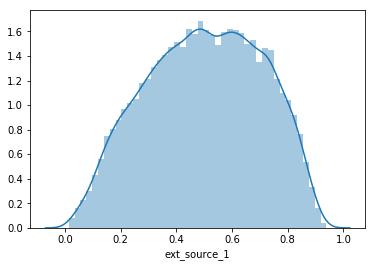

In [57]:
#ext_source_1
print(description['description'][41])
print(test.ext_source_1.isnull().sum())
sns.distplot(test.ext_source_1.dropna(), kde=True)

Normalized score from external data source
8


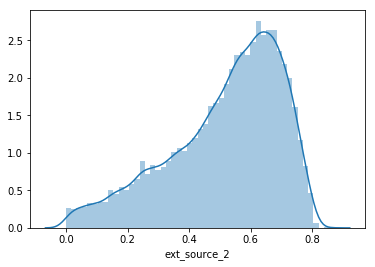

In [58]:
#ext_source_2
print(description['description'][42])
print(test.ext_source_2.isnull().sum())
sns.distplot(test.ext_source_2.dropna(), kde=True)

Normalized score from external data source
8668


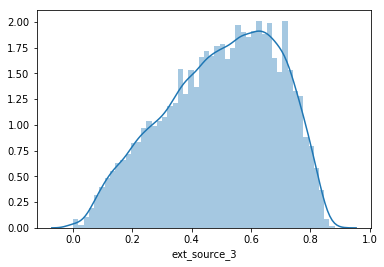

In [59]:
#ext_source_3
print(description['description'][43])
print(test.ext_source_3.isnull().sum())
sns.distplot(test.ext_source_3.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
23887


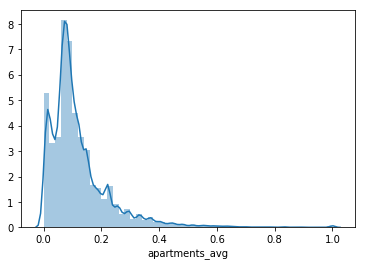

In [60]:
#apartments_avg - media do tamanho do apartamento, area comum, idade do predio, etc
print(description['description'][44])
print(test.apartments_avg.isnull().sum())
sns.distplot(test.apartments_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
27641


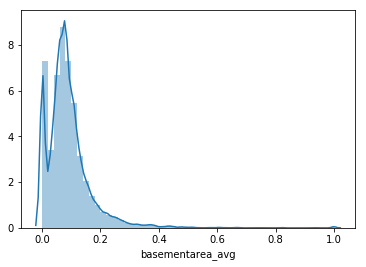

In [61]:
#basementarea_avg
print(description['description'][45])
print(test.basementarea_avg.isnull().sum())
sns.distplot(test.basementarea_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
22856


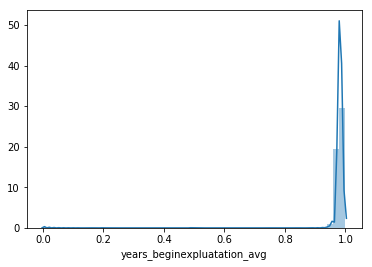

In [62]:
#years_beginexpluatation_avg
print(description['description'][46])
print(test.years_beginexpluatation_avg.isnull().sum())
sns.distplot(test.years_beginexpluatation_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
31818


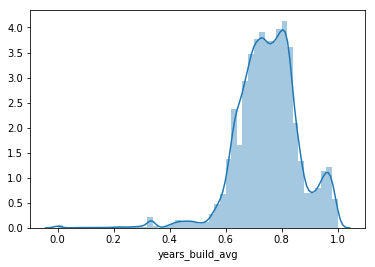

In [63]:
#years_build_avg
print(description['description'][47])
print(test.years_build_avg.isnull().sum())
sns.distplot(test.years_build_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
33495


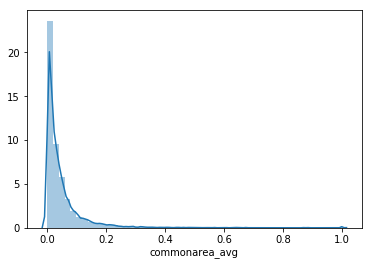

In [66]:
#commonarea_avg
print(description['description'][48])
print(test.commonarea_avg.isnull().sum())
sns.distplot(test.commonarea_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
25189


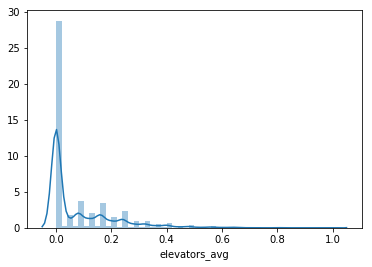

In [67]:
#elevators_avg
print(description['description'][49])
print(test.elevators_avg.isnull().sum())
sns.distplot(test.elevators_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
23579


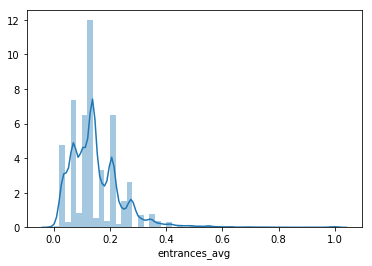

In [68]:
#entrances_avg
print(description['description'][50])
print(test.entrances_avg.isnull().sum())
sns.distplot(test.entrances_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor


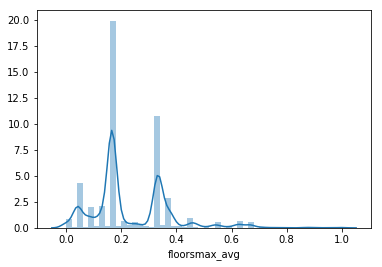

In [69]:
#floorsmax_avg
print(description['description'][51])
test.floorsmax_avg.isnull().sum()
sns.distplot(test.floorsmax_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
23321


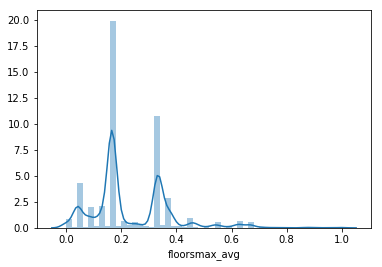

In [70]:
#floorsmax_avg
print(description['description'][51])
print(test.floorsmax_avg.isnull().sum())
sns.distplot(test.floorsmax_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
32466


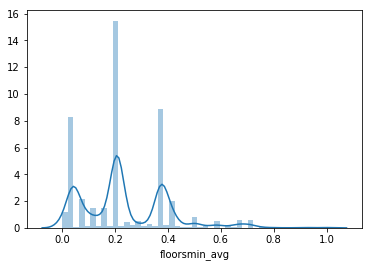

In [71]:
#floorsmin_avg
print(description['description'][52])
print(test.floorsmin_avg.isnull().sum())
sns.distplot(test.floorsmin_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
28254


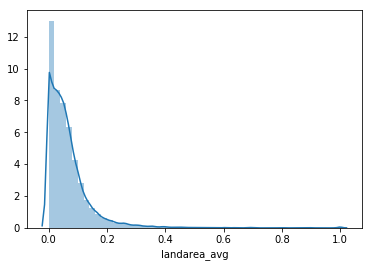

In [72]:
#landarea_avg
print(description['description'][53])
print(test.landarea_avg.isnull().sum())
sns.distplot(test.landarea_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
32780


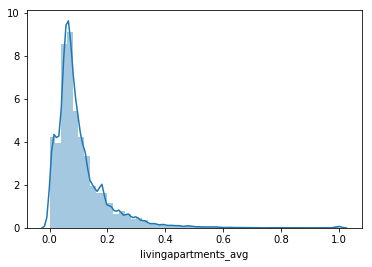

In [73]:
#livingapartments_avg
print(description['description'][54])
print(test.livingapartments_avg.isnull().sum())
sns.distplot(test.livingapartments_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
23552


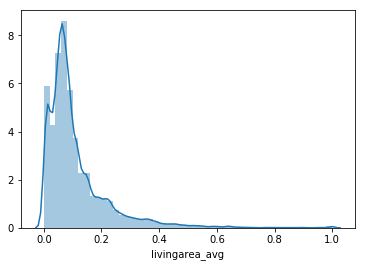

In [74]:
#livingarea_avg
print(description['description'][55])
print(test.livingarea_avg.isnull().sum())
sns.distplot(test.livingarea_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
33347


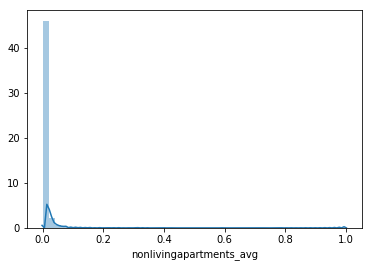

In [75]:
#nonlivingapartments_avg
print(description['description'][56])
print(test.nonlivingapartments_avg.isnull().sum())
sns.distplot(test.nonlivingapartments_avg.dropna(), kde=True)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
26084


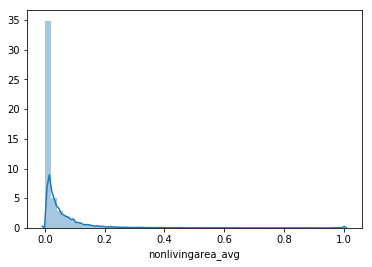

In [76]:
#nonlivingarea_avg
print(description['description'][57])
print(test.nonlivingarea_avg.isnull().sum())
sns.distplot(test.nonlivingarea_avg.dropna(), kde=True)

In [77]:
#mode - 58 a 72
#median - 59 a 85

In [78]:
#fondkapremont_mode
print(description['description'][86])
print(test.fondkapremont_mode.isnull().sum())
test.groupby(test.fondkapremont_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
32797


amt_annuity                                      \
                            count          mean           std     min   
fondkapremont_mode                                                      
not specified               913.0  30936.391019  17048.884780  4293.0   
org spec account            920.0  31521.942391  18323.386104  4738.5   
reg oper account          12118.0  30558.802236  16607.607372  2295.0   
reg oper spec account      1989.0  29965.438914  16259.379842  4369.5   

                                                               amt_credit  \
                             25%      50%        75%       max      count   
fondkapremont_mode                                                          
not specified          19066.500  27522.0  40324.500  177696.0      913.0   
org spec account       18847.125  27522.0  40201.875  180576.0      920.0   
reg oper account       18612.000  27094.5  39451.500  180576.0    12124.0   
reg oper spec account  18216.000  26730.0  38232.000  123592.5     1990.0   

                                                                        \
                                mean            std      min       25%   
fondkapremont_mode                                                       
not specified          557258.081599  400267.527799  45000.0  266652.0   
org spec account       557618.820652  402848.285651  45000.0  270000.0   
reg oper account       542730.915787  382520.873847  45000.0  267102.0   
reg oper spec account  537639.808794  381519.618247  45000.0  269982.0   

                                                     amt_goods_price  \
                            50%       75%        max           count   
fondkapremont_mode                                                     
not specified          454500.0  729792.0  2156400.0           913.0   
org spec account       450000.0  728460.0  2156400.0           920.0   
reg oper account       450000.0  693301.5  2156400.0         12124.0   
reg oper spec account  450000.0  675000.0  2156400.0          1990.0   

                                                                        \
                                mean            std      min       25%   
fondkapremont_mode                                                       
not specified          496541.114458  370682.648239  45000.0  225000.0   
org spec account       499778.403261  375965.417514  45000.0  225000.0   
reg oper account       484729.439995  351529.531289  45000.0  225000.0   
reg oper spec account  478584.719095  351076.299866  45000.0  225000.0   

                                                       amt_income_total  \
                            50%         75%        max            count   
fondkapremont_mode                                                        
not specified          450000.0  675000.000  1800000.0            913.0   
org spec account       423000.0  675000.000  1800000.0            920.0   
reg oper account       450000.0  675000.000  1800000.0          12124.0   
reg oper spec account  450000.0  651740.625  1800000.0           1990.0   

                                                                        \
                                mean            std      min       25%   
fondkapremont_mode                                                       
not specified          191423.217963  108144.375728  33768.0  121500.0   
org spec account       196313.546739  105207.460122  31500.0  135000.0   
reg oper account       192037.719737  105486.681421  27000.0  126000.0   
reg oper spec account  186464.797236  104658.968604  36000.0  121500.0   

                                                      \
                            50%       75%        max   
fondkapremont_mode                                     
not specified          180000.0  225000.0  1350000.0   
org spec account       179775.0  225000.0  1035000.0   
reg oper account       171000.0  225000.0  1912500.0   
reg oper spec account  157500.0  225000.0  180

In [79]:
#housetype_mode
print(description['description'][88])
print(test.housetype_mode.isnull().sum())
test.groupby(test.housetype_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
23619


amt_annuity                                                \
                       count          mean           std     min       25%   
housetype_mode                                                               
block of flats       24647.0  30326.734410  16656.406696  2295.0  18414.00   
specific housing       262.0  26669.009542  13709.941804  3753.0  16524.00   
terraced house         204.0  29423.757353  14408.173868  4266.0  19082.25   

                                                amt_credit                 \
                       50%        75%       max      count           mean   
housetype_mode                                                              
block of flats    26838.00  38886.750  180576.0    24659.0  536952.367472   
specific housing  24844.50  33894.000   69781.5      262.0  460229.358779   
terraced house    26772.75  36950.625   72072.0      204.0  546727.125000   

                                                                         \
                            std      min        25%       50%       75%   
housetype_mode                                                            
block of flats    381078.135873  45000.0  264888.00  450000.0  675000.0   
specific housing  311187.272207  45000.0  241659.00  407520.0  594121.5   
terraced house    365126.752947  52128.0  277580.25  476149.5  675666.0   

                            amt_goods_price                                \
                        max           count           mean            std   
housetype_mode                                                              
block of flats    2156400.0         24659.0  481850.881930  351900.468111   
specific housing  2156400.0           262.0  410598.085878  283512.650921   
terraced house    1988667.0           204.0  487730.294118  340373.172066   

                                                                    \
                      min       25%       50%       75%        max   
housetype_mode                                                       
block of flats    45000.0  225000.0  450000.0  675000.0  1800000.0   
specific housing  45000.0  225000.0  360000.0  495000.0  1800000.0   
terraced house    45000.0  238500.0  450000.0  652500.0  1800000.0   

                 amt_income_total                                         \
                            count           mean            std      min   
housetype_mode                                                             
block of flats            24659.0  189284.742755  104561.817681  27000.0   
specific housing            262.0  163114.694656   73041.462164  45000.0   
terraced house              204.0  175830.882353   86796.532939  45000.0   

                                                           \
                       25%       50%       75%        max   
housetype_mode                                              
block of flats    121500.0  162000.0  225000.0  3150000.0   
specific housing  112500.0  144000.0  202500.0   472500.0   
terraced house    112500.0  157500.0  225000.0   450000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
housetype_mode                                                                  
block of flats                     21873.0  0.001737  0.043786  0.0  0.0  0.0   
specific housing                     231.0  0.000000  0.000000  0.0  0.0  0.0   
terraced house                       176.0  0.000000  0.000000  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
housetype_mode                                                              
block of flats    0.0  2.0                    21873.0  0.001829  0.042726   
specific housing  0.0  0.0                      231.0  0.004329  0.065795   
terraced house    0.0  0.0                      176.0 

In [80]:
#wallsmaterial_mode
print(description['description'][89])
print(test.wallsmaterial_mode.isnull().sum())
test.groupby(test.wallsmaterial_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
23893


amt_annuity                                                 \
                         count          mean           std     min        25%   
wallsmaterial_mode                                                              
Block                   1426.0  31770.407083  18652.641950  3685.5  18514.125   
Mixed                    353.0  31453.317280  18209.336828  5337.0  19066.500   
Monolithic               289.0  36364.780277  19406.217284  5220.0  22324.500   
Others                   284.0  29258.556338  14821.236179  4293.0  18445.500   
Panel                  11264.0  30720.951483  16496.538732  2295.0  18750.375   
Stone, brick           10429.0  29515.981973  16516.938866  2439.0  17905.500   
Wooden                   794.0  28655.988665  14505.203781  4266.0  18165.375   

                                                  amt_credit                 \
                         50%        75%       max      count           mean   
wallsmaterial_mode                                                            
Block               27544.50  40937.625  180576.0     1428.0  563193.431723   
Mixed               27499.50  39667.500  170968.5      353.0  558180.089235   
Monolithic          32665.50  47299.500  173574.0      289.0  666926.019031   
Others              26061.75  38280.375   86980.5      284.0  522191.487676   
Panel               27364.50  39758.625  180576.0    11269.0  544588.170290   
Stone, brick        25924.50  37615.500  176062.5    10434.0  521436.602933   
Wooden              26066.25  35725.500   90877.5      794.0  495285.778338   

                                                                              \
                              std      min        25%        50%         75%   
wallsmaterial_mode                                                             
Block               401972.761167  45000.0  269982.00  479700.00  728460.000   
Mixed               409013.895088  45000.0  257391.00  450000.00  729792.000   
Monolithic          456915.291665  45000.0  358074.00  539100.00  864162.000   
Others              361528.949216  45000.0  269995.50  450551.25  694108.125   
Panel               383393.894218  45000.0  267102.00  450000.00  699624.000   
Stone, brick        372200.767435  45000.0  260640.00  450000.00  675000.000   
Wooden              339595.161899  45000.0  258203.25  433638.00  601868.250   

                              amt_goods_price                                \
                          max           count           mean            std   
wallsmaterial_mode                                                            
Block               2156400.0          1428.0  503853.375000  372160.554698   
Mixed               2085120.0           353.0  510368.838527  385015.927641   
Monolithic          2013840.0           289.0  602740.697232  428370.534440   
Others              2013840.0           284.0  466843.167254  336322.915044   
Panel               2156400.0         11269.0  489183.877585  353628.058726   
Stone, brick        2156400.0         10434.0  468127.315411  343979.937474   
Wooden              2156400.0           794.0  439039.762594  312148.436888   

                                                                      \
                        min       25%       50%       75%        max   
wallsmaterial_mode                                                     
Block               45000.0  225000.0  450000.0  675000.0  1800000.0   
Mixed               45000.0  225000.0  450000.0  675000.0  1800000.0   
Monolithic          45000.0  315000.0  454500.0  702000.0  1800000.0   
Others              45000.0  225000.0  405000.0  630000.0  1800000.0   
Panel               45000.0  225000.0  450000.0  675000.0  1800000.0   
Stone, brick        45000.0  225000.0  405000.0  630000.0  1800000.0   
Wooden              45000.0  225000.0  360000.0  540000.0  1800000.0   

                   amt_income_total                                         \
                          

In [81]:
#emergencystate_mode
print(description['description'][90])
print(test.emergencystate_mode.isnull().sum())
test.groupby(test.emergencystate_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
22209


amt_annuity                                               \
                          count          mean           std     min      25%   
emergencystate_mode                                                            
No                      26167.0  30246.003726  16580.425753  2295.0  18409.5   
Yes                       356.0  28378.984551  15793.748354  4608.0  18063.0   

                                                 amt_credit                 \
                         50%       75%       max      count           mean   
emergencystate_mode                                                          
No                   26833.5  38729.25  180576.0    26179.0  535917.836147   
Yes                  25447.5  35322.75  133848.0      356.0  481372.799157   

                                                                             \
                               std      min         25%       50%       75%   
emergencystate_mode                                                           
No                   380244.745778  45000.0  264888.000  450000.0  675000.0   
Yes                  332271.252134  45000.0  239709.375  418104.0  601834.5   

                               amt_goods_price                                \
                           max           count           mean            std   
emergencystate_mode                                                            
No                   2156400.0         26179.0  480912.082623  351076.955069   
Yes                  1887975.0           356.0  430413.686798  304718.834844   

                                                                       \
                         min       25%       50%       75%        max   
emergencystate_mode                                                     
No                   45000.0  225000.0  450000.0  675000.0  1800000.0   
Yes                  45000.0  225000.0  360000.0  500625.0  1800000.0   

                    amt_income_total                                         \
                               count           mean            std      min   
emergencystate_mode                                                           
No                           26179.0  188559.098842  104661.349434  27000.0   
Yes                            356.0  172502.949438   95882.657223  45000.0   

                                                              \
                          25%       50%       75%        max   
emergencystate_mode                                            
No                   121500.0  162000.0  225000.0  3150000.0   
Yes                  112500.0  150750.0  203625.0   810000.0   

                    amt_req_credit_bureau_day                                \
                                        count      mean       std  min  25%   
emergencystate_mode                                                           
No                                    23216.0  0.001594  0.041995  0.0  0.0   
Yes                                     312.0  0.006410  0.079935  0.0  0.0   

                                   amt_req_credit_bureau_hour            \
                     50%  75%  max                      count      mean   
emergencystate_mode                                                       
No                   0.0  0.0  2.0                    23216.0  0.001723   
Yes                  0.0  0.0  1.0                      312.0  0.003205   

                                                        \
                          std  min  25%  50%  75%  max   
emergencystate_mode                                      
No                   0.041474  0.0  0.0  0.0  0.0  1.0   
Yes                  0.056614  0.0  0.0  0.0  0.0  1.0   

                    amt_req_credit_bureau_mon                                \
                                        count      mean       std  min  25%   
emergencystate_mode                                                           
No                                    23216.0  0

In [82]:
#obs_30_cnt_social_circle - observacoes com 30 dias devido a inadimplencia
print(description['description'][91])
print(test.obs_30_cnt_social_circle.isnull().sum())
test.groupby(test.obs_30_cnt_social_circle).describe()

How many observation of client's social surroundings with observable 30 DPD (days past due) default
29


amt_annuity                                       \
                               count          mean           std      min   
obs_30_cnt_social_circle                                                    
0.0                          26010.0  29673.183564  16348.093782   2439.0   
1.0                           7762.0  29309.884437  15835.373063   2965.5   
2.0                           4748.0  29371.627001  15727.434841   3343.5   
3.0                           3268.0  28813.677632  15557.468830   2295.0   
4.0                           2201.0  28902.704680  15040.646533   3492.0   
5.0                           1467.0  28813.070552  15434.909717   3361.5   
6.0                           1034.0  29536.838008  16338.974770   4396.5   
7.0                            695.0  29084.814388  14977.123368   2425.5   
8.0                            486.0  28464.750000  15073.448593   4243.5   
9.0                            344.0  28388.289244  13216.874357   4450.5   
10.0                           218.0  27334.589450  14079.229461   5337.0   
11.0                           135.0  32756.166667  19474.160165   4473.0   
12.0                           107.0  30235.626168  15463.655713   4855.5   
13.0                            64.0  26795.039062  13828.558306   4608.0   
14.0                            49.0  30084.428571  15136.705308   5895.0   
15.0                            30.0  26725.800000  12969.928090   4450.5   
16.0                            20.0  31281.975000  15856.094629  12577.5   
17.0                            16.0  22886.437500  12514.564549   4954.5   
18.0                            10.0  36301.050000  16522.262906  19197.0   
19.0                             8.0  28949.062500  23661.311332   6916.5   
20.0                             9.0  27279.500000  18244.242126  11362.5   
21.0                             2.0  31365.000000  25290.381136  13482.0   
22.0                             1.0  13117.500000           NaN  13117.5   
23.0                             3.0  28267.500000  11851.158456  21177.0   
29.0                             1.0  38335.500000           NaN  38335.5   
352.0                            1.0   8734.500000           NaN   8734.5   
353.0                            1.0  38583.000000           NaN  38583.0   
354.0                            1.0  25389.000000           NaN  25389.0   

                                                                   amt_credit  \
                                25%       50%        75%       max      count   
obs_30_cnt_social_circle                                                        
0.0                       17973.000  26248.50  37954.125  180576.0    26025.0   
1.0                       17905.500  26230.50  36886.500  176062.5     7765.0   
2.0                       18256.500  26248.50  36785.250  180576.0     4751.0   
3.0                       17775.000  25632.00  36040.500  170968.5     3269.0   
4.0                       18193.500  25866.00  36090.000  109728.0     2202.0   
5.0                       17973.000  25906.50  36420.750  138555.0     1467.0   
6.0                       18178.875  26473.50  36837.000  173704.5     1034.0   
7.0                       18256.500  25614.00  37887.750  123462.0      695.0   
8.0                       17775.000  25447.50  35554.500  115555.5      486.0   
9.0                       18589.500  26388.00  35587.125   77364.0      344.0   
10.0                      17006.625  24349.50  34249.500   95836.5      219.0   
11.0                      20513.250  27652.50  40252.500  130311.0      135.0   
12.0                      18582.750  28075.50  39026.250   74110.5      107.0   
13.0                      15744.375  23775.75  35773.875   66663.0       64.0   
14.0                      18256.500  28440.00  41868.000   62545.5       49.0   
15.0                      18713.250  23964.75  30175.875   68643.0       30.0   
16.0                      19127.250  28471.50  43119.000   72081.0       20.0   
17.0             

In [83]:
#def_30_cnt_social_circle -
print(description['description'][92])
print(test.def_30_cnt_social_circle.isnull().sum())
test.groupby(test.def_30_cnt_social_circle).describe()

How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
29


amt_annuity                                       \
                               count          mean           std      min   
def_30_cnt_social_circle                                                    
0.0                          43173.0  29582.196373  16186.877484   2295.0   
1.0                           4443.0  28345.691425  14436.600600   2983.5   
2.0                            832.0  27848.174279  14790.636225   3685.5   
3.0                            189.0  27448.309524  16066.084400   5337.0   
4.0                             40.0  26787.262500  13133.250914   7101.0   
5.0                              8.0  26403.750000   8765.948848  15457.5   
6.0                              3.0  22089.000000   7097.139635  14508.0   
34.0                             3.0  24235.500000  14957.645528   8734.5   

                                                                   amt_credit  \
                                25%       50%        75%       max      count   
def_30_cnt_social_circle                                                        
0.0                       17986.500  26298.00  37615.500  180576.0    43195.0   
1.0                       18049.500  25402.50  35511.750  133848.0     4443.0   
2.0                       17616.375  25015.50  34957.125  103455.0      834.0   
3.0                       17127.000  25447.50  32746.500  138555.0      189.0   
4.0                       16189.875  26185.50  33025.500   59589.0       40.0   
5.0                       21659.625  25665.75  30231.000   42970.5        8.0   
6.0                       18846.000  23184.00  25879.500   28575.0        3.0   
34.0                      17061.750  25389.00  31986.000   38583.0        3.0   

                                                                             \
                                   mean            std       min        25%   
def_30_cnt_social_circle                                                      
0.0                       520426.412351  369422.862046   45000.0  260640.00   
1.0                       489733.867657  329142.158962   45000.0  260640.00   
2.0                       489532.052158  347696.222213   45000.0  248760.00   
3.0                       448566.380952  296222.973326   45000.0  239787.00   
4.0                       446940.787500  287523.000090   78192.0  225128.25   
5.0                       453821.625000  299969.836708  135531.0  258736.50   
6.0                       319800.000000  164198.416558  225000.0  225000.00   
34.0                      490984.500000  356740.556222  100246.5  336827.25   

                                                          amt_goods_price  \
                               50%         75%        max           count   
def_30_cnt_social_circle                                                    
0.0                       450000.0  675000.000  2245500.0         43195.0   
1.0                       435424.5  622413.000  2156400.0          4443.0   
2.0                       429232.5  651870.000  2156400.0           834.0   
3.0                       373500.0  574668.000  1800000.0           189.0   
4.0                       399879.0  555397.875  1350000.0            40.0   
5.0                       305640.0  692820.000   967500.0             8.0   
6.0                       225000.0  367200.000   509400.0             3.0   
34.0                      573408.0  686353.500   799299.0             3.0   

                                                                            \
                                   mean            std       min       25%   
def_30_cnt_social_circle                                                     
0.0                       465967.149821  340410.207986   45000.0  225000.0   
1.0                       437767.552667  303308.616454   45000.0  225000.0   
2.0                       437301.285971  318413.154255   45000.0  225000.0   
3.0                       401521.071429  277628.085603   45000.0  225000.0   
4.0                  

In [84]:
#obs_60_cnt_social_circle
print(description['description'][93])
print(test.obs_60_cnt_social_circle.isnull().sum())
test.groupby(test.obs_60_cnt_social_circle).describe()

How many observation of client's social surroundings with observable 60 DPD (days past due) default
29


amt_annuity                                       \
                               count          mean           std      min   
obs_60_cnt_social_circle                                                    
0.0                          26125.0  29669.343330  16339.673715   2439.0   
1.0                           7738.0  29309.911411  15831.125588   2965.5   
2.0                           4732.0  29439.761729  15766.780168   3343.5   
3.0                           3261.0  28635.743790  15573.791259   2295.0   
4.0                           2198.0  29086.378526  15073.643084   3492.0   
5.0                           1441.0  28818.065579  15339.117031   3361.5   
6.0                           1030.0  29532.892718  16288.278127   4396.5   
7.0                            677.0  28911.709010  14990.425657   2425.5   
8.0                            490.0  28321.971429  15014.030555   4243.5   
9.0                            334.0  28451.479042  13206.211290   4450.5   
10.0                           215.0  27974.344186  15836.277372   5337.0   
11.0                           131.0  32351.187023  17576.876510   4473.0   
12.0                           106.0  29965.372642  15322.408873   4855.5   
13.0                            67.0  27015.246269  14420.859734   4608.0   
14.0                            45.0  29463.800000  15061.123833   4450.5   
15.0                            32.0  26521.453125  12285.748627  10525.5   
16.0                            17.0  33862.235294  15875.399899  12577.5   
17.0                            16.0  22182.750000  12462.279992   4954.5   
18.0                            12.0  39573.375000  20396.899940  19197.0   
19.0                             6.0  25733.250000  16437.676417   6916.5   
20.0                             8.0  24132.937500  16690.276747  11362.5   
21.0                             2.0  31365.000000  25290.381136  13482.0   
22.0                             1.0  13117.500000           NaN  13117.5   
23.0                             3.0  28267.500000  11851.158456  21177.0   
29.0                             1.0  38335.500000           NaN  38335.5   
349.0                            2.0  23658.750000  21106.076758   8734.5   
351.0                            1.0  25389.000000           NaN  25389.0   

                                                                   amt_credit  \
                                25%       50%        75%       max      count   
obs_60_cnt_social_circle                                                        
0.0                       17973.000  26257.50  37930.500  180576.0    26140.0   
1.0                       17905.500  26230.50  36819.000  176062.5     7741.0   
2.0                       18261.000  26295.75  37000.125  180576.0     4735.0   
3.0                       17568.000  25452.00  35739.000  170968.5     3262.0   
4.0                       18229.500  26145.00  36540.000  108157.5     2199.0   
5.0                       18081.000  26077.50  36292.500  138555.0     1441.0   
6.0                       18198.000  26406.00  37047.375  173704.5     1030.0   
7.0                       18085.500  25488.00  37557.000  123462.0      677.0   
8.0                       17775.000  25447.50  35554.500  115555.5      490.0   
9.0                       18658.125  26538.75  35652.375   77364.0      334.0   
10.0                      17102.250  24439.50  34562.250  130311.0      216.0   
11.0                      20661.750  27522.00  40198.500   91701.0      131.0   
12.0                      18388.125  28278.00  37947.375   74110.5      106.0   
13.0                      15538.500  24012.00  36049.500   66663.0       67.0   
14.0                      18256.500  27652.50  40234.500   62545.5       45.0   
15.0                      18617.625  23566.50  29966.625   68643.0       32.0   
16.0                      19435.500  31801.50  43659.000   72081.0       17.0   
17.0                      15574.500  18882.00  26771.625   53095.5       16.0   
18.0         

In [85]:
#def_60_cnt_social_circle
print(description['description'][94])
print(test.def_60_cnt_social_circle.isnull().sum())
test.groupby(test.def_60_cnt_social_circle).describe()

How many observation of client's social surroundings defaulted on 60 (days past due) DPD
29


amt_annuity                                       \
                               count          mean           std      min   
def_60_cnt_social_circle                                                    
0.0                          44592.0  29573.944396  16153.067056   2295.0   
1.0                           3483.0  27978.740310  14195.374406   2983.5   
2.0                            495.0  27317.909091  14312.361754   3685.5   
3.0                             97.0  26097.262887  18403.691792   5337.0   
4.0                             17.0  25507.852941  12806.680112   7101.0   
5.0                              4.0  24939.000000   6129.360122  17086.5   
24.0                             3.0  24235.500000  14957.645528   8734.5   

                                                                amt_credit  \
                               25%       50%      75%       max      count   
def_60_cnt_social_circle                                                     
0.0                       18004.50  26325.00  37615.5  180576.0    44614.0   
1.0                       17912.25  25159.50  34825.5  133848.0     3484.0   
2.0                       16983.00  24786.00  34240.5   93006.0      496.0   
3.0                       16020.00  21955.50  29862.0  138555.0       97.0   
4.0                       14175.00  23184.00  33214.5   56092.5       17.0   
5.0                       21926.25  25665.75  28678.5   31338.0        4.0   
24.0                      17061.75  25389.00  31986.0   38583.0        3.0   

                                                                             \
                                   mean            std       min        25%   
def_60_cnt_social_circle                                                      
0.0                       519962.580065  368384.439536   45000.0  260640.00   
1.0                       483903.346154  326136.895523   45000.0  260640.00   
2.0                       480728.649194  353836.531414   45000.0  232875.00   
3.0                       418348.298969  300704.729529   45000.0  225000.00   
4.0                       401357.382353  251792.659906   88618.5  225000.00   
5.0                       462190.500000  337378.687117  269982.0  289705.50   
24.0                      490984.500000  356740.556222  100246.5  336827.25   

                                                         amt_goods_price  \
                                50%       75%        max           count   
def_60_cnt_social_circle                                                   
0.0                       450000.00  675000.0  2245500.0         44614.0   
1.0                       423627.75  607500.0  2156400.0          3484.0   
2.0                       394830.00  630000.0  2156400.0           496.0   
3.0                       312840.00  550980.0  1800000.0            97.0   
4.0                       392238.00  539959.5  1096020.0            17.0   
5.0                       305640.00  478125.0   967500.0             4.0   
24.0                      573408.00  686353.5   799299.0             3.0   

                                                                            \
                                   mean            std       min       25%   
def_60_cnt_social_circle                                                     
0.0                       465516.154727  339438.608555   45000.0  225000.0   
1.0                       432695.375287  301333.421750   45000.0  225000.0   
2.0                       429583.908266  320298.223384   45000.0  225000.0   
3.0                       375383.783505  280259.861998   45000.0  225000.0   
4.0                       362911.764706  218915.525610   76500.0  225000.0   
5.0                       436500.000000  356211.313689  225000.0  235125.0   
24.0                      426000.000000  316197.722952   81000.0  288000.0   

                                                        amt_income_total  \
                               50%       75%        max         

How many days before application did client change phone
0


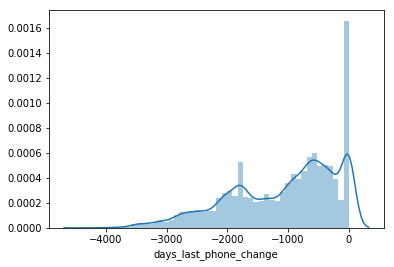

In [86]:
#days_last_phone_change
print(description['description'][95])
print(test.days_last_phone_change.isnull().sum())
sns.distplot(test.days_last_phone_change.dropna(), kde=True)

In [87]:
#flag_document_2
print(description['description'][96])
print(test.flag_document_2.isnull().sum())
test.groupby(test.flag_document_2).describe()

Did client provide document 2
0


amt_annuity                                               \
                      count          mean           std     min      25%   
flag_document_2                                                            
0                   48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                            amt_credit                 \
                     50%      75%       max      count           mean   
flag_document_2                                                         
0                26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                       \
                           std      min       25%       50%       75%   
flag_document_2                                                         
0                365397.004174  45000.0  260640.0  450000.0  675000.0   

                           amt_goods_price                               \
                       max           count           mean           std   
flag_document_2                                                           
0                2245500.0         48744.0  462618.840473  336710.21504   

                                                                   \
                     min       25%       50%       75%        max   
flag_document_2                                                     
0                45000.0  225000.0  396000.0  630000.0  2245500.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_document_2                                                           
0                        48744.0  178431.805855  101522.591536  26941.5   

                                                          \
                      25%       50%       75%        max   
flag_document_2                                            
0                112500.0  157500.0  225000.0  4410000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_2                                                                
0                                 42695.0  0.001803  0.046132  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_2                                                                 
0                0.0  2.0                    42695.0  0.002108  0.046373  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_2                                                           
0                0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_2                                                                
0                0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                              \
                     mean       std  min  25%  50%  75%  max   
flag_document_2                                                
0                0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                amt_req_credit_bureau_week                                     \
                                     count      mean       std  min  25%  50%   
flag_document_2                                                                 
0                                  42695.0  0.002787  0.054037  0.0  0.0  0.0   

                          amt_req_credit_bureau_year                           \
                 75%  max                      count      mean       std  

In [88]:
#flag_document_3
print(description['description'][97])
print(test.flag_document_3.isnull().sum())
test.groupby(test.flag_document_3).describe()

Did client provide document 3
0


amt_annuity                                               \
                      count          mean           std     min      25%   
flag_document_3                                                            
0                   10397.0  29874.817880  17621.475769  2439.0  17392.5   
1                   38323.0  29304.541437  15550.379007  2295.0  18135.0   

                                            amt_credit                 \
                     50%      75%       max      count           mean   
flag_document_3                                                         
0                26118.0  38704.5  180576.0    10401.0  519632.546582   
1                26230.5  37125.0  180576.0    38343.0  515955.915656   

                                                                       \
                           std      min       25%       50%       75%   
flag_document_3                                                         
0                375187.026093  45000.0  252531.0  450000.0  675000.0   
1                362696.796128  45000.0  260640.0  450000.0  675000.0   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_document_3                                                            
0                2245500.0         10401.0  467401.319585  347554.034332   
1                2156400.0         38343.0  461321.535482  333700.771314   

                                                                   \
                     min       25%       50%       75%        max   
flag_document_3                                                     
0                45000.0  225000.0  382500.0  630000.0  2245500.0   
1                45000.0  225000.0  400500.0  625500.0  1800000.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_document_3                                                           
0                        10401.0  190730.268388  119645.791276  26941.5   
1                        38343.0  175095.699948   95748.252282  27000.0   

                                                          \
                      25%       50%       75%        max   
flag_document_3                                            
0                112500.0  160884.0  225000.0  3150000.0   
1                112500.0  157500.0  211500.0  4410000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_3                                                                
0                                  9012.0  0.002552  0.054679  0.0  0.0  0.0   
1                                 33683.0  0.001603  0.043561  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_3                                                                 
0                0.0  2.0                     9012.0  0.002441  0.049351  0.0   
1                0.0  2.0                    33683.0  0.002019  0.045543  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_3                                                           
0                0.0  0.0  0.0  1.0                    9012.0  0.008877   
1                0.0  0.0  0.0  2.0                   33683.0  0.009411   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_3                                                                
0                0.113112  0.0  0.0  0.0  0.0  5.0                    9012.0

In [89]:
#flag_document_4
print(description['description'][98])
print(test.flag_document_4.isnull().sum())
test.groupby(test.flag_document_4).describe()

Did client provide document 4
0


amt_annuity                                               \
                      count          mean           std     min      25%   
flag_document_4                                                            
0                   48715.0  29427.994006  16016.188747  2295.0  17973.0   
1                       5.0  12339.000000   5069.677911  6561.0   7695.0   

                                            amt_credit                 \
                     50%      75%       max      count           mean   
flag_document_4                                                         
0                26203.5  37390.5  180576.0    48739.0  516772.026324   
1                13041.0  16951.5   17446.5        5.0  208800.000000   

                                                                        \
                           std       min       25%       50%       75%   
flag_document_4                                                          
0                365401.481359   45000.0  260640.0  450000.0  675000.0   
1                 92090.716144  126000.0  153000.0  180000.0  225000.0   

                           amt_goods_price                               \
                       max           count          mean            std   
flag_document_4                                                           
0                2245500.0         48739.0  462644.87905  336716.637449   
1                 360000.0             5.0  208800.00000   92090.716144   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_4                                                      
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   
1                126000.0  153000.0  180000.0  225000.0   360000.0   

                amt_income_total                                          \
                           count           mean            std       min   
flag_document_4                                                            
0                        48739.0  178432.475935  101524.902909   26941.5   
1                            5.0  171900.000000   84331.488781  112500.0   

                                                          \
                      25%       50%       75%        max   
flag_document_4                                            
0                112500.0  157500.0  225000.0  4410000.0   
1                117000.0  135000.0  180000.0   315000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_4                                                                
0                                 42692.0  0.001804  0.046134  0.0  0.0  0.0   
1                                     3.0  0.000000  0.000000  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_4                                                                 
0                0.0  2.0                    42692.0  0.002108  0.046374  0.0   
1                0.0  0.0                        3.0  0.000000  0.000000  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_4                                                           
0                0.0  0.0  0.0  2.0                   42692.0  0.009299   
1                0.0  0.0  0.0  0.0                       3.0  0.000000   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_4                                                                
0                0.110927  0.0  0.0  0.0  0.0  6.0                

In [90]:
#flag_document_5
print(description['description'][99])
print(test.flag_document_5.isnull().sum())
test.groupby(test.flag_document_5).describe()

Did client provide document 5
0


amt_annuity                                               \
                      count          mean           std     min      25%   
flag_document_5                                                            
0                   48002.0  29420.537832  15988.527103  2295.0  17973.0   
1                     718.0  29807.473538  17787.286927  4581.0  17775.0   

                                               amt_credit                 \
                      50%        75%       max      count           mean   
flag_document_5                                                            
0                26221.50  37390.500  180576.0    48025.0  516784.231546   
1                25616.25  38370.375  164457.0      719.0  513815.119611   

                                                                       \
                           std      min       25%       50%       75%   
flag_document_5                                                         
0                364873.492163  45000.0  260640.0  450000.0  675000.0   
1                399077.718662  45000.0  225000.0  427896.0  675000.0   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_document_5                                                            
0                2245500.0         48025.0  462631.163519  336309.722759   
1                2156400.0           719.0  461795.732962  362711.085973   

                                                                   \
                     min       25%       50%       75%        max   
flag_document_5                                                     
0                45000.0  225000.0  400500.0  630000.0  2245500.0   
1                45000.0  225000.0  373500.0  630000.0  1800000.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_document_5                                                           
0                        48025.0  178305.336171  101564.469023  26941.5   
1                          719.0  186879.242003   98386.048050  27000.0   

                                                          \
                      25%       50%       75%        max   
flag_document_5                                            
0                112500.0  157500.0  225000.0  4410000.0   
1                117000.0  162000.0  225000.0   900000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_5                                                                
0                                 42084.0  0.001806  0.046210  0.0  0.0  0.0   
1                                   611.0  0.001637  0.040456  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_5                                                                 
0                0.0  2.0                    42084.0  0.002067  0.045941  0.0   
1                0.0  1.0                      611.0  0.004910  0.069956  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_5                                                           
0                0.0  0.0  0.0  2.0                   42084.0  0.009243   
1                0.0  0.0  0.0  1.0                     611.0  0.013093   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_5                                                                
0                0.108718  0.0  0.0  0.0  0.0  6.0           

In [91]:
#flag_document_6
print(description['description'][100])
print(test.flag_document_6.isnull().sum())
test.groupby(test.flag_document_6).describe()

Did client provide document 6
0


amt_annuity                                                 \
                      count          mean           std     min        25%   
flag_document_6                                                              
0                   44456.0  29849.575704  16168.661664  2295.0  18256.500   
1                    4264.0  25012.590408  13568.950957  2439.0  16005.375   

                                              amt_credit                 \
                      50%       75%       max      count           mean   
flag_document_6                                                           
0                26707.50  38133.00  180576.0    44480.0  522797.886320   
1                22956.75  30719.25  173704.5     4264.0  453552.018644   

                                                                        \
                           std      min       25%        50%       75%   
flag_document_6                                                          
0                369733.540415  45000.0  260640.0  450000.00  675000.0   
1                309689.878940  45000.0  242212.5  369947.25  589045.5   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_document_6                                                            
0                2245500.0         44480.0  468778.550686  341003.819458   
1                2156400.0          4264.0  398363.702040  280204.099747   

                                                                   \
                     min       25%       50%       75%        max   
flag_document_6                                                     
0                45000.0  225000.0  405000.0  630000.0  2245500.0   
1                45000.0  225000.0  328500.0  495000.0  1800000.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_document_6                                                           
0                        44480.0  181544.152745  102884.433270  27000.0   
1                         4264.0  145965.297960   79053.298562  26941.5   

                                                          \
                      25%       50%       75%        max   
flag_document_6                                            
0                112500.0  157500.0  225000.0  4410000.0   
1                 90000.0  135000.0  180000.0  1350000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_6                                                                
0                                 38959.0  0.001643  0.044715  0.0  0.0  0.0   
1                                  3736.0  0.003480  0.058894  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_6                                                                 
0                0.0  2.0                    38959.0  0.002207  0.047476  0.0   
1                0.0  1.0                     3736.0  0.001071  0.032708  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_6                                                           
0                0.0  0.0  0.0  2.0                   38959.0  0.009651   
1                0.0  0.0  0.0  1.0                    3736.0  0.005621   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_6                                                                
0                0.113557  0.0  0.0  0.0  0.0  6.0 

In [92]:
#flag_document_7
print(description['description'][101])
print(test.flag_document_7.isnull().sum())
test.groupby(test.flag_document_7).describe()

Did client provide document 7
0


amt_annuity                                                 \
                      count          mean           std      min       25%   
flag_document_7                                                              
0                   48718.0  29427.009483  16016.246630   2295.0  17973.00   
1                       2.0  10687.500000    795.495129  10125.0  10406.25   

                                              amt_credit                 \
                      50%       75%       max      count           mean   
flag_document_7                                                           
0                26201.25  37390.50  180576.0    48742.0  516752.867978   
1                10687.50  10968.75   11250.0        2.0  213750.000000   

                                                                        \
                           std       min       25%       50%       75%   
flag_document_7                                                          
0                365399.338915   45000.0  260640.0  450000.0  675000.0   
1                 15909.902577  202500.0  208125.0  213750.0  219375.0   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_document_7                                                            
0                2245500.0         48742.0  462629.052152  336713.341411   
1                 225000.0             2.0  213750.000000   15909.902577   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_7                                                      
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   
1                202500.0  208125.0  213750.0  219375.0   225000.0   

                amt_income_total                                          \
                           count           mean            std       min   
flag_document_7                                                            
0                        48742.0  178432.664737  101524.585869   26941.5   
1                            2.0  157500.000000       0.000000  157500.0   

                                                          \
                      25%       50%       75%        max   
flag_document_7                                            
0                112500.0  157500.0  225000.0  4410000.0   
1                157500.0  157500.0  157500.0   157500.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_7                                                                
0                                 42693.0  0.001804  0.046133  0.0  0.0  0.0   
1                                     2.0  0.000000  0.000000  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_7                                                                 
0                0.0  2.0                    42693.0  0.002108  0.046374  0.0   
1                0.0  0.0                        2.0  0.000000  0.000000  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_7                                                           
0                0.0  0.0  0.0  2.0                   42693.0  0.009299   
1                0.0  0.0  0.0  0.0                       2.0  0.000000   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_7                                                                
0                0.110926  0.0  0.0  0.0 

In [93]:
#flag_document_8
print(description['description'][102])
print(test.flag_document_8.isnull().sum())
test.groupby(test.flag_document_8).describe()

Did client provide document 8
0


amt_annuity                                               \
                      count          mean           std     min      25%   
flag_document_8                                                            
0                   44411.0  28773.001013  15528.151493  2295.0  17775.0   
1                    4309.0  36158.894175  19120.816704  4162.5  23076.0   

                                            amt_credit                 \
                     50%      75%       max      count           mean   
flag_document_8                                                         
0                25600.5  36265.5  180576.0    44432.0  508521.462505   
1                32274.0  47254.5  180576.0     4312.0  601430.929731   

                                                                       \
                           std      min       25%       50%       75%   
flag_document_8                                                         
0                359318.374042  45000.0  259794.0  448272.0  670500.0   
1                413616.034079  45000.0  292500.0  500490.0  781920.0   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_document_8                                                            
0                2245500.0         44432.0  454584.066000  330428.663796   
1                2156400.0          4312.0  545411.303224  386094.949603   

                                                                   \
                     min       25%       50%       75%        max   
flag_document_8                                                     
0                45000.0  225000.0  378000.0  598500.0  2245500.0   
1                45000.0  247500.0  450000.0  675000.0  1800000.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_document_8                                                           
0                        44432.0  172939.602192   96410.354111  26941.5   
1                         4312.0  235024.939703  131239.005304  45000.0   

                                                          \
                      25%       50%       75%        max   
flag_document_8                                            
0                112500.0  157500.0  202500.0  4410000.0   
1                157500.0  202500.0  270000.0  2700000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_8                                                                
0                                 38929.0  0.001824  0.046139  0.0  0.0  0.0   
1                                  3766.0  0.001593  0.046068  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_8                                                                 
0                0.0  2.0                    38929.0  0.002029  0.045570  0.0   
1                0.0  2.0                     3766.0  0.002921  0.053973  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_8                                                           
0                0.0  0.0  0.0  2.0                   38929.0  0.009171   
1                0.0  0.0  0.0  1.0                    3766.0  0.010621   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_8                                                                
0                0.111473  0.0  0.0  0.0  0.0  6.0                   38929.0

In [94]:
#flag_document_9
print(description['description'][103])
print(test.flag_document_9.isnull().sum())
test.groupby(test.flag_document_9).describe()

Did client provide document 9
0


amt_annuity                                               \
                      count          mean           std     min      25%   
flag_document_9                                                            
0                   48501.0  29386.759974  15995.596838  2295.0  17941.5   
1                     219.0  38169.760274  18124.213815  6421.5  25425.0   

                                            amt_credit                 \
                     50%      75%       max      count           mean   
flag_document_9                                                         
0                26172.0  37336.5  180576.0    48525.0  516123.783060   
1                35554.5  52654.5  103455.0      219.0  653375.424658   

                                                                       \
                           std      min       25%       50%       75%   
flag_document_9                                                         
0                364952.709667  45000.0  260640.0  450000.0  675000.0   
1                433030.496712  62554.5  308070.0  573408.0  848745.0   

                           amt_goods_price                                \
                       max           count           mean            std   
flag_document_9                                                            
0                2245500.0         48525.0  462036.192890  336279.735220   
1                2013840.0           219.0  591719.178082  401945.677782   

                                                                   \
                     min       25%       50%       75%        max   
flag_document_9                                                     
0                45000.0  225000.0  396000.0  630000.0  2245500.0   
1                54000.0  270000.0  495000.0  720000.0  1800000.0   

                amt_income_total                                         \
                           count           mean            std      min   
flag_document_9                                                           
0                        48525.0  178096.740744  100950.978190  26941.5   
1                          219.0  252673.972603  174795.371145  63000.0   

                                                          \
                      25%       50%       75%        max   
flag_document_9                                            
0                112500.0  157500.0  225000.0  4410000.0   
1                157500.0  225000.0  292500.0  1800000.0   

                amt_req_credit_bureau_day                                     \
                                    count      mean       std  min  25%  50%   
flag_document_9                                                                
0                                 42520.0  0.001787  0.045973  0.0  0.0  0.0   
1                                   175.0  0.005714  0.075593  0.0  0.0  0.0   

                          amt_req_credit_bureau_hour                           \
                 75%  max                      count      mean       std  min   
flag_document_9                                                                 
0                0.0  2.0                    42520.0  0.002093  0.046215  0.0   
1                0.0  1.0                      175.0  0.005714  0.075593  0.0   

                                    amt_req_credit_bureau_mon            \
                 25%  50%  75%  max                     count      mean   
flag_document_9                                                           
0                0.0  0.0  0.0  2.0                   42520.0  0.009290   
1                0.0  0.0  0.0  1.0                     175.0  0.011429   

                                                   amt_req_credit_bureau_qrt  \
                      std  min  25%  50%  75%  max                     count   
flag_document_9                                                                
0                0.110942  0.0  0.0  0.0  0.0  6.0                   42520.0

In [95]:
#flag_document_10
print(description['description'][104])
print(test.flag_document_10.isnull().sum())
test.groupby(test.flag_document_10).describe()

Did client provide document 10
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_10                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_10                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_10                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_10                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_10                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_10                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_10                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_10                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_10                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_10                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_10                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_10                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_10                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [96]:
#flag_document_11
print(description['description'][105])
print(test.flag_document_11.isnull().sum())
test.groupby(test.flag_document_11).describe()

Did client provide document 11
0


amt_annuity                                                \
                       count          mean           std     min       25%   
flag_document_11                                                             
0                    48663.0  29432.058998  16008.690992  2295.0  17979.75   
1                       57.0  24458.526316  21203.913811  5791.5   9463.50   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_11                                                         
0                 26221.5  37390.5  180576.0    48687.0  516732.756424   
1                 15903.0  28975.5   91516.5       57.0  523299.631579   

                                                                         \
                            std       min       25%       50%       75%   
flag_document_11                                                          
0                 365177.890269   45000.0  260640.0  450000.0  675000.0   
1                 524430.133916  135000.0  135000.0  270000.0  675000.0   

                            amt_goods_price                                \
                        max           count           mean            std   
flag_document_11                                                            
0                 2245500.0         48687.0  462569.576499  336470.040311   
1                 2160000.0            57.0  504698.052632  504140.970253   

                                                                     \
                       min       25%       50%       75%        max   
flag_document_11                                                      
0                  45000.0  225000.0  398938.5  630000.0  2245500.0   
1                 135000.0  135000.0  270000.0  675000.0  2160000.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_11                                                           
0                         48687.0  178445.509768  101544.804851  26941.5   
1                            57.0  166726.500000   80184.822381  72000.0   

                                                           \
                       25%       50%       75%        max   
flag_document_11                                            
0                 112500.0  157500.0  225000.0  4410000.0   
1                 112500.0  148180.5  202500.0   495000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_11                                                                
0                                  42647.0  0.001759  0.045133  0.0  0.0  0.0   
1                                     48.0  0.041667  0.288675  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                          \
                  75%  max                      count     mean       std  min   
flag_document_11                                                                
0                 0.0  2.0                    42647.0  0.00211  0.046399  0.0   
1                 0.0  2.0                       48.0  0.00000  0.000000  0.0   

                                     amt_req_credit_bureau_mon            \
                  25%  50%  75%  max                     count      mean   
flag_document_11                                                           
0                 0.0  0.0  0.0  2.0                   42647.0  0.009286   
1                 0.0  0.0  0.0  0.0                      48.0  0.020833   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_11                                                                
0             

In [97]:
#flag_document_12
print(description['description'][106])
print(test.flag_document_12.isnull().sum())
test.groupby(test.flag_document_12).describe()

Did client provide document 12
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_12                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_12                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_12                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_12                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_12                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_12                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_12                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_12                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_12                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_12                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_12                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_12                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_12                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [98]:
#flag_document_13
print(description['description'][107])
print(test.flag_document_13.isnull().sum())
test.groupby(test.flag_document_13).describe()

Did client provide document 13
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_13                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_13                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_13                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_13                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_13                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_13                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_13                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_13                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_13                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_13                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_13                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_13                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_13                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [99]:
#flag_document_14
print(description['description'][108])
print(test.flag_document_14.isnull().sum())
test.groupby(test.flag_document_14).describe()

Did client provide document 14
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_14                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_14                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_14                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_14                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_14                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_14                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_14                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_14                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_14                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_14                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_14                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_14                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_14                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [100]:
#flag_document_15
print(description['description'][109])
print(test.flag_document_15.isnull().sum())
test.groupby(test.flag_document_15).describe()

Did client provide document 15
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_15                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_15                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_15                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_15                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_15                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_15                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_15                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_15                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_15                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_15                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_15                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_15                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_15                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [101]:
#flag_document_16
print(description['description'][110])
print(test.flag_document_16.isnull().sum())
test.groupby(test.flag_document_16).describe()

Did client provide document 16
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_16                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_16                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_16                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_16                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_16                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_16                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_16                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_16                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_16                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_16                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_16                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_16                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_16                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [102]:
#flag_document_17
print(description['description'][111])
print(test.flag_document_17.isnull().sum())
test.groupby(test.flag_document_17).describe()

Did client provide document 17
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_17                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_17                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_17                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_17                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_17                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_17                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_17                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_17                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_17                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_17                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_17                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_17                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_17                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [103]:
#flag_document_18
print(description['description'][112])
print(test.flag_document_18.isnull().sum())
test.groupby(test.flag_document_18).describe()

Did client provide document 18
0


amt_annuity                                                 \
                       count          mean           std     min        25%   
flag_document_18                                                              
0                    48644.0  29433.053069  16017.758774  2295.0  17976.375   
1                       76.0  25065.651316  14551.878560  5791.5  13216.500   

                                               amt_credit                 \
                      50%        75%       max      count           mean   
flag_document_18                                                           
0                 26212.5  37390.500  180576.0    48668.0  516743.277585   
1                 22185.0  36750.375   57330.0       76.0  514920.493421   

                                                                          \
                            std       min       25%       50%        75%   
flag_document_18                                                           
0                 365417.113299   45000.0  260640.0  450000.0  675000.00   
1                 354620.432663  135000.0  225000.0  389844.0  749184.75   

                            amt_goods_price                                \
                        max           count           mean            std   
flag_document_18                                                            
0                 2245500.0         48668.0  462559.110915  336687.508174   
1                 1350000.0            76.0  500867.763158  351173.297116   

                                                                     \
                       min       25%       50%       75%        max   
flag_document_18                                                      
0                  45000.0  225000.0  396000.0  630000.0  2245500.0   
1                 135000.0  225000.0  371250.0  743404.5  1350000.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_18                                                           
0                         48668.0  178458.379039  101542.095888  26941.5   
1                            76.0  161415.177632   87065.148839  40347.0   

                                                              \
                         25%       50%        75%        max   
flag_document_18                                               
0                 112500.000  157500.0  225000.00  4410000.0   
1                  99334.125  144040.5  185960.25   537462.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_18                                                                
0                                  42631.0  0.001806  0.046167  0.0  0.0  0.0   
1                                     64.0  0.000000  0.000000  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_18                                                            
0                 0.0  2.0                    42631.0  0.002111  0.046407   
1                 0.0  0.0                       64.0  0.000000  0.000000   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_18                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42631.0  0.009312   
1                 0.0  0.0  0.0  0.0  0.0                      64.0  0.000000   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_18                                       

In [104]:
#flag_document_19
print(description['description'][113])
print(test.flag_document_19.isnull().sum())
test.groupby(test.flag_document_19).describe()

Did client provide document 19
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_19                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_19                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_19                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_19                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_19                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_19                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_19                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_19                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_19                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_19                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_19                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_19                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_19                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [105]:
#flag_document_20
print(description['description'][114])
print(test.flag_document_20.isnull().sum())
test.groupby(test.flag_document_20).describe()

Did client provide document 20
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_20                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_20                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_20                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_20                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_20                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_20                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_20                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_20                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_20                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_20                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_20                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_20                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_20                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [106]:
#flag_document_21
print(description['description'][115])
print(test.flag_document_21.isnull().sum())
test.groupby(test.flag_document_21).describe()

Did client provide document 21
0


amt_annuity                                               \
                       count          mean           std     min      25%   
flag_document_21                                                            
0                    48720.0  29426.240209  16016.368315  2295.0  17973.0   

                                             amt_credit                 \
                      50%      75%       max      count           mean   
flag_document_21                                                         
0                 26199.0  37390.5  180576.0    48744.0  516740.435561   

                                                                        \
                            std      min       25%       50%       75%   
flag_document_21                                                         
0                 365397.004174  45000.0  260640.0  450000.0  675000.0   

                            amt_goods_price                               \
                        max           count           mean           std   
flag_document_21                                                           
0                 2245500.0         48744.0  462618.840473  336710.21504   

                                                                    \
                      min       25%       50%       75%        max   
flag_document_21                                                     
0                 45000.0  225000.0  396000.0  630000.0  2245500.0   

                 amt_income_total                                         \
                            count           mean            std      min   
flag_document_21                                                           
0                         48744.0  178431.805855  101522.591536  26941.5   

                                                           \
                       25%       50%       75%        max   
flag_document_21                                            
0                 112500.0  157500.0  225000.0  4410000.0   

                 amt_req_credit_bureau_day                                     \
                                     count      mean       std  min  25%  50%   
flag_document_21                                                                
0                                  42695.0  0.001803  0.046132  0.0  0.0  0.0   

                           amt_req_credit_bureau_hour                      \
                  75%  max                      count      mean       std   
flag_document_21                                                            
0                 0.0  2.0                    42695.0  0.002108  0.046373   

                                          amt_req_credit_bureau_mon            \
                  min  25%  50%  75%  max                     count      mean   
flag_document_21                                                                
0                 0.0  0.0  0.0  0.0  2.0                   42695.0  0.009299   

                                                    amt_req_credit_bureau_qrt  \
                       std  min  25%  50%  75%  max                     count   
flag_document_21                                                                
0                 0.110924  0.0  0.0  0.0  0.0  6.0                   42695.0   

                                                               \
                      mean       std  min  25%  50%  75%  max   
flag_document_21                                                
0                 0.546902  0.693305  0.0  0.0  0.0  1.0  7.0   

                 amt_req_credit_bureau_week                                \
                                      count      mean       std  min  25%   
flag_document_21                                                            
0                                   42695.0  0.002787  0.054037  0.0  0.0   

                                amt_req_credit_bureau_year            \
                  50%  75%  max                     

In [107]:
#amt_req_credit_bureau_hour -
print(description['description'][116])
print(test.amt_req_credit_bureau_hour.isnull().sum())
test.groupby(test.amt_req_credit_bureau_hour).describe()

Number of enquiries to Credit Bureau about the client one hour before application
6049


amt_annuity                                       \
                                 count          mean           std      min   
amt_req_credit_bureau_hour                                                    
0.0                            42583.0  29489.522098  16038.557494   2295.0   
1.0                               88.0  32308.107955  19760.886882   7875.0   
2.0                                1.0  39591.000000           NaN  39591.0   

                                                                     \
                                  25%       50%       75%       max   
amt_req_credit_bureau_hour                                            
0.0                         18036.000  26230.50  37426.50  180576.0   
1.0                         17992.125  27677.25  43341.75   98640.0   
2.0                         39591.000  39591.00  39591.00   39591.0   

                           amt_credit                                          \
                                count           mean            std       min   
amt_req_credit_bureau_hour                                                      
0.0                           42606.0  523885.682615  369961.679327   45000.0   
1.0                              88.0  515093.062500  367696.970501   99504.0   
2.0                               1.0  509922.000000            NaN  509922.0   

                                                                       \
                                 25%        50%        75%        max   
amt_req_credit_bureau_hour                                              
0.0                         260640.0  450000.00  675000.00  2160000.0   
1.0                         242820.0  453422.25  660233.25  2013840.0   
2.0                         509922.0  509922.00  509922.00   509922.0   

                           amt_goods_price                                \
                                     count           mean            std   
amt_req_credit_bureau_hour                                                 
0.0                                42606.0  469389.360900  341172.892620   
1.0                                   88.0  464153.982955  337324.288709   
2.0                                    1.0  472500.000000            NaN   

                                                                               \
                                 min       25%       50%       75%        max   
amt_req_credit_bureau_hour                                                      
0.0                          45000.0  225000.0  409500.0  630000.0  2160000.0   
1.0                          90000.0  212625.0  389250.0  582750.0  1800000.0   
2.0                         472500.0  472500.0  472500.0  472500.0   472500.0   

                           amt_income_total                                \
                                      count           mean            std   
amt_req_credit_bureau_hour                                                  
0.0                                 42606.0  181244.453002  102083.034178   
1.0                                    88.0  200925.000000  108954.681341   
2.0                                     1.0  351000.000000            NaN   

                                                                               \
                                 min       25%       50%       75%        max   
amt_req_credit_bureau_hour                                                      
0.0                          26941.5  112500.0  157500.0  225000.0  4410000.0   
1.0                          67500.0  122625.0  180000.0  244800.0   630000.0   
2.0                         351000.0  351000.0  351000.0  351000.0   351000.0   

                           amt_req_credit_bureau_day                           \
                                               count      mean       std  min   
amt_req_credit_bureau_hour                                                      
0.0                                          42606.0  0.001526

In [108]:
#amt_req_credit_bureau_day
print(description['description'][117])
print(test.amt_req_credit_bureau_day.isnull().sum())
test.groupby(test.amt_req_credit_bureau_day).describe()

Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
6049


amt_annuity                                       \
                                count          mean           std      min   
amt_req_credit_bureau_day                                                    
0.0                           42602.0  29492.212643  16049.783560   2295.0   
1.0                              63.0  30687.357143  12713.143591   9490.5   
2.0                               7.0  39211.071429  25058.623631  16672.5   

                                                                 amt_credit  \
                                25%      50%       75%       max      count   
amt_req_credit_bureau_day                                                     
0.0                        18022.50  26230.5  37435.50  180576.0    42625.0   
1.0                        21678.75  28440.0  38783.25   71131.5       63.0   
2.0                        23573.25  35685.0  41728.50   91516.5        7.0   

                                                                             \
                                    mean            std       min       25%   
amt_req_credit_bureau_day                                                     
0.0                        523814.216622  370003.500527   45000.0  260640.0   
1.0                        539138.071429  286270.132015  118512.0  326155.5   
2.0                        709260.428571  647240.356087  272520.0  450000.0   

                                                          amt_goods_price  \
                                50%        75%        max           count   
amt_req_credit_bureau_day                                                   
0.0                        450000.0  675000.00  2156400.0         42625.0   
1.0                        487971.0  729312.75  1304064.0            63.0   
2.0                        509922.0  561190.50  2160000.0             7.0   

                                                                             \
                                    mean            std       min       25%   
amt_req_credit_bureau_day                                                     
0.0                        469334.659460  341194.464382   45000.0  225000.0   
1.0                        477004.785714  258411.122113   90000.0  267750.0   
2.0                        668571.428571  663491.172296  225000.0  450000.0   

                                                         amt_income_total  \
                                50%       75%        max            count   
amt_req_credit_bureau_day                                                   
0.0                        409500.0  630000.0  1800000.0          42625.0   
1.0                        450000.0  675000.0  1246801.5             63.0   
2.0                        450000.0  472500.0  2160000.0              7.0   

                                                                            \
                                    mean            std      min       25%   
amt_req_credit_bureau_day                                                    
0.0                        181276.117550  102113.628619  26941.5  112500.0   
1.0                        182785.714286   91955.662277  54000.0  112500.0   
2.0                        246222.000000  113576.463178  90000.0  162000.0   

                                                          \
                                50%       75%        max   
amt_req_credit_bureau_day                                  
0.0                        157500.0  225000.0  4410000.0   
1.0                        166500.0  220500.0   540000.0   
2.0                        247500.0  344250.0   373554.0   

                          amt_req_credit_bureau_hour                           \
                                               count      mean       std  min   
amt_req_credit_bureau_day                                                       
0.0                                          42625.0  0.001830  0.042739  0.0   
1.0                                             63.0

In [109]:
#amt_req_credit_bureau_week
print(description['description'][118])
print(test.amt_req_credit_bureau_week.isnull().sum())
test.groupby(test.amt_req_credit_bureau_week).describe()

Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
6049


amt_annuity                                       \
                                 count          mean           std      min   
amt_req_credit_bureau_week                                                    
0.0                            42556.0  29491.939292  16031.383368   2295.0   
1.0                              113.0  31220.920354  21253.493773   5791.5   
2.0                                3.0  16030.500000   4248.096132  11799.0   

                                                                  amt_credit  \
                                 25%      50%       75%       max      count   
amt_req_credit_bureau_week                                                     
0.0                         18036.00  26235.0  37435.50  177826.5    42579.0   
1.0                         18049.50  25614.0  40428.00  180576.0      113.0   
2.0                         13898.25  15997.5  18146.25   20295.0        3.0   

                                                                              \
                                     mean            std       min       25%   
amt_req_credit_bureau_week                                                     
0.0                         523794.531072  369973.019667   45000.0  260640.0   
1.0                         556721.323009  363144.681671   52128.0  285723.0   
2.0                         318219.000000  210676.598442  190764.0  196632.0   

                                                          amt_goods_price  \
                                 50%       75%        max           count   
amt_req_credit_bureau_week                                                  
0.0                         450000.0  675000.0  2160000.0         42579.0   
1.0                         454500.0  746280.0  1871280.0           113.0   
2.0                         202500.0  381946.5   561393.0             3.0   

                                                                              \
                                     mean            std       min       25%   
amt_req_credit_bureau_week                                                     
0.0                         469302.838618  341171.941690   45000.0  225000.0   
1.0                         503115.889381  337730.804044   45000.0  238500.0   
2.0                         274500.000000  165218.037756  157500.0  180000.0   

                                                          amt_income_total  \
                                 50%       75%        max            count   
amt_req_credit_bureau_week                                                   
0.0                         409500.0  630000.0  2160000.0          42579.0   
1.0                         450000.0  675000.0  1800000.0            113.0   
2.0                         202500.0  333000.0   463500.0              3.0   

                                                                              \
                                     mean            std       min       25%   
amt_req_credit_bureau_week                                                     
0.0                         181303.177343  102160.760676   26941.5  112500.0   
1.0                         176575.898230   78705.128455   45000.0  121500.0   
2.0                         157500.000000   38971.143170  135000.0  135000.0   

                                                           \
                                 50%       75%        max   
amt_req_credit_bureau_week                                  
0.0                         157500.0  225000.0  4410000.0   
1.0                         157500.0  220500.0   477000.0   
2.0                         135000.0  168750.0   202500.0   

                           amt_req_credit_bureau_day                           \
                                               count      mean       std  min   
amt_req_credit_bureau_week                                                      
0.0                                          42579.0  0.001714  0.044647  0.0   
1.0  

In [110]:
#amt_req_credit_bureau_mon
print(description['description'][119])
print(test.amt_req_credit_bureau_mon.isnull().sum())
test.groupby(test.amt_req_credit_bureau_mon).describe()

Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
6049


amt_annuity                                       \
                                count          mean           std      min   
amt_req_credit_bureau_mon                                                    
0.0                           42318.0  29483.957359  16038.066624   2295.0   
1.0                             324.0  31032.777778  17302.155651   4725.0   
2.0                              23.0  29571.065217  14212.832281  11808.0   
3.0                               4.0  32436.000000  20605.423509  16083.0   
4.0                               1.0  18297.000000           NaN  18297.0   
5.0                               1.0  35613.000000           NaN  35613.0   
6.0                               1.0  14508.000000           NaN  14508.0   

                                                                     \
                                 25%       50%        75%       max   
amt_req_credit_bureau_mon                                             
0.0                        18004.500  26230.50  37452.375  180576.0   
1.0                        19515.375  27726.75  37832.625  146610.0   
2.0                        18886.500  25960.50  36726.750   56092.5   
3.0                        22974.750  25524.00  34985.250   62613.0   
4.0                        18297.000  18297.00  18297.000   18297.0   
5.0                        35613.000  35613.00  35613.000   35613.0   
6.0                        14508.000  14508.00  14508.000   14508.0   

                          amt_credit                                          \
                               count           mean            std       min   
amt_req_credit_bureau_mon                                                      
0.0                          42341.0  523849.510841  370126.844093   45000.0   
1.0                            324.0  524950.277778  349468.654397   45000.0   
2.0                             23.0  568029.326087  369379.629181  114682.5   
3.0                              4.0  465367.500000  238975.353175  260640.0   
4.0                              1.0  266832.000000            NaN  266832.0   
5.0                              1.0  697500.000000            NaN  697500.0   
6.0                              1.0  225000.000000            NaN  225000.0   

                                                                      \
                                  25%       50%       75%        max   
amt_req_credit_bureau_mon                                              
0.0                        260640.000  450000.0  675000.0  2160000.0   
1.0                        290937.375  450000.0  675000.0  2156400.0   
2.0                        309996.000  450000.0  728460.0  1528200.0   
3.0                        301410.000  405000.0  568957.5   790830.0   
4.0                        266832.000  266832.0  266832.0   266832.0   
5.0                        697500.000  697500.0  697500.0   697500.0   
6.0                        225000.000  225000.0  225000.0   225000.0   

                          amt_goods_price                                \
                                    count           mean            std   
amt_req_credit_bureau_mon                                                 
0.0                               42341.0  469375.561182  341320.713112   
1.0                                 324.0  468603.472222  322625.901030   
2.0                                  23.0  504000.000000  339555.558448   
3.0                                   4.0  427500.000000  199562.020435   
4.0                                   1.0  238500.000000            NaN   
5.0                                   1.0  697500.000000            NaN   
6.0                                   1.0  225000.000000            NaN   

                                                                              \
                                min       25%       50%       75%        max   
amt_req_credit_bureau_mon                                                      
0.0                  

In [111]:
#amt_req_credit_bureau_qrt
print(description['description'][120])
print(test.amt_req_credit_bureau_qrt.isnull().sum())
test.groupby(test.amt_req_credit_bureau_qrt).describe()

Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
6049


amt_annuity                                       \
                                count          mean           std      min   
amt_req_credit_bureau_qrt                                                    
0.0                           23548.0  29274.327862  15907.746404   2425.5   
1.0                           15563.0  29760.728459  16214.329495   2439.0   
2.0                            2997.0  29912.933934  16318.316925   2295.0   
3.0                             494.0  29272.864372  15082.616805   3361.5   
4.0                              57.0  30661.973684  20438.384097   9531.0   
5.0                              11.0  20160.409091   9424.657259   6750.0   
6.0                               1.0  23337.000000           NaN  23337.0   
7.0                               1.0  14242.500000           NaN  14242.5   

                                                                   amt_credit  \
                                25%       50%        75%       max      count   
amt_req_credit_bureau_qrt                                                       
0.0                        17905.50  26041.50  36891.000  177696.0    23559.0   
1.0                        18130.50  26500.50  38146.500  177826.5    15573.0   
2.0                        18571.50  26833.50  38403.000  180576.0     2998.0   
3.0                        18855.00  26286.75  36228.375  103455.0      495.0   
4.0                        18040.50  27423.00  36270.000  133848.0       57.0   
5.0                        15212.25  19242.00  27276.750   37273.5       11.0   
6.0                        23337.00  23337.00  23337.000   23337.0        1.0   
7.0                        14242.50  14242.50  14242.500   14242.5        1.0   

                                                                             \
                                    mean            std       min       25%   
amt_req_credit_bureau_qrt                                                     
0.0                        524831.001019  372896.669997   45000.0  260640.0   
1.0                        525084.686573  370989.104245   45000.0  260640.0   
2.0                        514863.328719  347276.835808   45000.0  270000.0   
3.0                        499764.990909  331239.150283   45000.0  277681.5   
4.0                        520116.473684  350214.794898   85500.0  260640.0   
5.0                        322732.636364  241472.922746   98109.0  173250.0   
6.0                        454500.000000            NaN  454500.0  454500.0   
7.0                        279000.000000            NaN  279000.0  279000.0   

                                                          amt_goods_price  \
                                50%        75%        max           count   
amt_req_credit_bureau_qrt                                                   
0.0                        450000.0  675000.00  2160000.0         23559.0   
1.0                        450000.0  675000.00  2156400.0         15573.0   
2.0                        450000.0  675000.00  2156400.0          2998.0   
3.0                        450000.0  639852.75  2013840.0           495.0   
4.0                        420367.5  742500.00  1687266.0            57.0   
5.0                        225000.0  371916.00   853200.0            11.0   
6.0                        454500.0  454500.00   454500.0             1.0   
7.0                        279000.0  279000.00   279000.0             1.0   

                                                                             \
                                    mean            std       min       25%   
amt_req_credit_bureau_qrt                                                     
0.0                        470405.029097  343820.760317   45000.0  225000.0   
1.0                        470510.324697  341934.662944   45000.0  225000.0   
2.0                        460241.501668  321724.667316   45000.0  225000.0   
3.0                        445723.781818  305820.220473   45000.0  234000.0   
4.0 

In [112]:
#amt_req_credit_bureau_year
print(description['description'][121])
print(test.amt_req_credit_bureau_year.isnull().sum())
test.groupby(test.amt_req_credit_bureau_year).describe()

Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
6049


amt_annuity                                       \
                                 count          mean           std      min   
amt_req_credit_bureau_year                                                    
0.0                            10837.0  29900.910030  16286.962827   3321.0   
1.0                             9206.0  30459.438790  16456.610772   2295.0   
2.0                             8482.0  29712.736029  16115.133353   2425.5   
3.0                             6190.0  28578.805735  15300.880121   2439.0   
4.0                             3744.0  28620.883413  15483.723040   2596.5   
5.0                             2074.0  28382.875603  15782.043362   4243.5   
6.0                             1125.0  28178.632000  16261.932763   3492.0   
7.0                              553.0  27408.336347  14593.307225   4828.5   
8.0                              297.0  26655.333333  14778.172367   4594.5   
9.0                              122.0  26925.528689  16938.091237   5476.5   
10.0                              21.0  34443.857143  20820.027534   6291.0   
11.0                              12.0  23535.375000  11863.640201   5283.0   
12.0                               5.0  16826.400000  12026.291632   7317.0   
13.0                               2.0  22414.500000   9889.595442  15421.5   
14.0                               1.0  25312.500000           NaN  25312.5   
17.0                               1.0  21024.000000           NaN  21024.0   

                                                                      \
                                  25%       50%        75%       max   
amt_req_credit_bureau_year                                             
0.0                         18171.000  26829.00  38263.500  177826.5   
1.0                         18819.000  27094.50  39201.750  176062.5   
2.0                         18193.500  26266.50  37557.000  180576.0   
3.0                         17763.750  25447.50  35713.125  177826.5   
4.0                         17597.250  25618.50  36040.500  134604.0   
5.0                         17770.500  25449.75  35353.125  164457.0   
6.0                         16708.500  24813.00  35869.500  170968.5   
7.0                         16623.000  25083.00  35554.500   87111.0   
8.0                         16150.500  24376.50  34173.000  106452.0   
9.0                         14011.875  22149.00  35401.500   94509.0   
10.0                        22432.500  27801.00  47299.500   95836.5   
11.0                        12451.500  24277.50  34466.625   36990.0   
12.0                         7951.500  13482.00  18688.500   36693.0   
13.0                        18918.000  22414.50  25911.000   29407.5   
14.0                        25312.500  25312.50  25312.500   25312.5   
17.0                        21024.000  21024.00  21024.000   21024.0   

                           amt_credit                                          \
                                count           mean            std       min   
amt_req_credit_bureau_year                                                      
0.0                           10839.0  525134.358151  371749.176896   45000.0   
1.0                            9211.0  544347.237922  382430.801631   45000.0   
2.0                            8489.0  534735.215750  374223.333884   45000.0   
3.0                            6194.0  506197.495883  356877.082687   45000.0   
4.0                            3745.0  508360.521629  354185.793363   45000.0   
5.0                            2076.0  500998.146676  351311.993582   45000.0   
6.0                            1127.0  500106.298137  375404.031287   45000.0   
7.0                             553.0  474667.698011  352564.432883   49752.0   
8.0                             297.0  472361.575758  352392.998579   45000.0   
9.0                             122.0  468108.811475  353755.845299   52128.0   
10.0                             21.0  530859.642857  338886.152236  100737.0   
11.0                  

### Ideias de features

In [ ]:
#nova feature - divisao do day/hour before application
#amt_credit/amt_income_total - nova feature how much people take relative to the income